# **check access to the GPU**

In [ ]:
!nvidia-smi

Thu Nov 30 08:28:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Install dependences

In [ ]:
!pip install fiftyone
!pip install fiftyone-db-ubuntu2204
!pip install ultralytics comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.0/646.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.4/586.4 kB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.2/512.2 kB 29.0 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.6.4
    Uninstalling websocket-client-1.6.4:
      Successfully uninstalled websocket-client-1.6.4
  Attempting uninstall: python-box
    Found existing installation: pytho

#**Importing the Required Libraries**

In [ ]:
import os
import glob
from IPython.display import Image, display
from IPython import display
display.clear_output()

In [ ]:
import fiftyone as fo
import fiftyone.utils.ultralytics as fou
import fiftyone.zoo as foz

Migrating database to v0.22.3


INFO:fiftyone.migrations.runner:Migrating database to v0.22.3


In [ ]:
import comet_ml
import ultralytics
from ultralytics import YOLO

# Load Dataset

In [ ]:
ds_train = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    dataset_name="COCO-2017-train",
    label_types=["detections"],
    classes=["person"],
    shuffle=True,
    dataset_dir='./data',
    max_samples=4000,
    seed=43
)

ds_val = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    dataset_name="COCO-2017-validation",
    label_types=["detections"],
    classes=["person"],
    shuffle=True,
    dataset_dir='./data',
    max_samples=500,
    seed=43
)

ds_test = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    dataset_name="COCO-2017-test",
    label_types=["detections"],
    classes=["person"],
    shuffle=True,
    dataset_dir='./data',
    max_samples=500,
    seed=43
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to './data/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to './data/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [2.6s elapsed, 0s remaining, 869.5Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [2.6s elapsed, 0s remaining, 869.5Mb/s]      


Extracting annotations to 'data/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to 'data/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 4000 images


 100% |████████████████| 4000/4000 [8.3m elapsed, 0s remaining, 8.8 images/s]       


INFO:eta.core.utils: 100% |████████████████| 4000/4000 [8.3m elapsed, 0s remaining, 8.8 images/s]       


Writing annotations for 4000 downloaded samples to './data/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 4000 downloaded samples to './data/train/labels.json'


Dataset info written to './data/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to './data/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████| 4000/4000 [31.9s elapsed, 0s remaining, 157.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 4000/4000 [31.9s elapsed, 0s remaining, 157.6 samples/s]      


Dataset 'COCO-2017-train' created


INFO:fiftyone.zoo.datasets:Dataset 'COCO-2017-train' created


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to './data/validation' if necessary


Found annotations at 'data/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at 'data/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 500 images


 100% |██████████████████| 500/500 [1.0m elapsed, 0s remaining, 8.7 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 500/500 [1.0m elapsed, 0s remaining, 8.7 images/s]      


Writing annotations for 500 downloaded samples to './data/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 500 downloaded samples to './data/validation/labels.json'


Dataset info written to './data/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to './data/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 500/500 [5.4s elapsed, 0s remaining, 138.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [5.4s elapsed, 0s remaining, 138.8 samples/s]      


Dataset 'COCO-2017-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'COCO-2017-validation' created


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to './data/validation' if necessary


Found annotations at 'data/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at 'data/raw/instances_val2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 500/500 [3.7s elapsed, 0s remaining, 154.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [3.7s elapsed, 0s remaining, 154.8 samples/s]      


Dataset 'COCO-2017-test' created


INFO:fiftyone.zoo.datasets:Dataset 'COCO-2017-test' created


In [ ]:
def pickPersonLabel(dataset):
  # Iterate over the dataset
  for sample in dataset:
      # Get the detections
      detections = sample.ground_truth.detections
      # Filter out non-person detections
      detections = [d for d in detections if d.label == "person"]
      # Update the detections
      sample.ground_truth.detections = detections
      # Save the sample
      sample.save()

In [ ]:
pickPersonLabel(ds_train)
pickPersonLabel(ds_val)
pickPersonLabel(ds_test)

In [ ]:
train_classes = ds_train.distinct("ground_truth.detections.label")
val_classes = ds_val.distinct("ground_truth.detections.label")
test_classes = ds_test.distinct("ground_truth.detections.label")

In [ ]:
print("train classes:", train_classes)
print("val classes:", val_classes)
print("test classes:", test_classes)

train classes: ['person']
val classes: ['person']
test classes: ['person']


In [ ]:
# The path to export the dataset
EXPORT_DIR = "/content/tmp/oiv7-yolo"

# YOLO format requires a common classes list
classes = ds_train.distinct("ground_truth.detections.label")

ds_train.export(
    export_dir=EXPORT_DIR,
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
    split="train",
    classes=classes,
)

ds_val.export(
    export_dir=EXPORT_DIR,
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
    split="val",
    classes=classes,
)

ds_test.export(
    export_dir=EXPORT_DIR,
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
    split="test",
    classes=classes,
)

 100% |███████████████| 4000/4000 [10.6s elapsed, 0s remaining, 263.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 4000/4000 [10.6s elapsed, 0s remaining, 263.9 samples/s]      


Directory '/content/tmp/oiv7-yolo' already exists; export will be merged with existing files


 100% |█████████████████| 500/500 [1.8s elapsed, 0s remaining, 295.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [1.8s elapsed, 0s remaining, 295.8 samples/s]      


Directory '/content/tmp/oiv7-yolo' already exists; export will be merged with existing files


 100% |█████████████████| 500/500 [1.9s elapsed, 0s remaining, 297.6 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [1.9s elapsed, 0s remaining, 297.6 samples/s]      


# Check ultralytics and init comet_ml

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [ ]:
comet_ml.init(project_name="personDetection-yolov8")

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


#**Train the YOLOv8 Model on Person Class (COCO128 Dataset)**

In [ ]:
# Load a model
model = YOLO('yolov8m.pt')  # load a pretrained model (recommended for training)
# Train the model
results = model.train(data='/content/tmp/oiv7-yolo/dataset.yaml',
                      project="personDetection-yolov8",
                      epochs=50,
                      imgsz=640)


100%|██████████| 49.7M/49.7M [00:00<00:00, 213MB/s]


Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/tmp/oiv7-yolo/dataset.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=personDetection-yolov8, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 755k/755k [00:00<00:00, 15.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/nadyanvl/persondetection-yolov8/b64e7ec80cd64aa482f82b46f8a4355d



TensorBoard: Start with 'tensorboard --logdir personDetection-yolov8/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 74.3MB/s]


AMP: checks passed ✅


train: Scanning /content/tmp/oiv7-yolo/labels/train... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:02<00:00, 1747.05it/s]


train: New cache created: /content/tmp/oiv7-yolo/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/tmp/oiv7-yolo/labels/val... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 698.11it/s]

val: New cache created: /content/tmp/oiv7-yolo/labels/val.cache


Plotting labels to personDetection-yolov8/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to personDetection-yolov8/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.86G      1.299      1.314      1.374         97        640: 100%|██████████| 250/250 [02:29<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]

                   all        500       2157      0.402      0.365      0.294       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.28G      1.644      1.692      1.617        153        640: 100%|██████████| 250/250 [02:24<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        500       2157      0.462      0.442      0.387      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.14G      1.665      1.718      1.631        126        640: 100%|██████████| 250/250 [02:23<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.13it/s]


                   all        500       2157      0.553        0.4      0.419      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.29G      1.585      1.623      1.585         97        640: 100%|██████████| 250/250 [02:24<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.35it/s]


                   all        500       2157      0.565      0.407      0.435      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.23G      1.546      1.557      1.561        102        640: 100%|██████████| 250/250 [02:22<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]

                   all        500       2157      0.558      0.477      0.491      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.26G      1.481      1.474      1.501        115        640: 100%|██████████| 250/250 [02:24<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.76it/s]

                   all        500       2157      0.659      0.465      0.528      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       7.1G      1.432      1.414      1.475        139        640: 100%|██████████| 250/250 [02:23<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.01it/s]

                   all        500       2157      0.616        0.5      0.536      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.27G      1.409       1.38      1.458         92        640: 100%|██████████| 250/250 [02:22<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.25it/s]

                   all        500       2157      0.643      0.521      0.573      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.21G       1.39      1.348      1.451        110        640: 100%|██████████| 250/250 [02:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.15it/s]

                   all        500       2157      0.667      0.531      0.588       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.28G      1.361      1.317       1.43         92        640: 100%|██████████| 250/250 [02:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        500       2157      0.651      0.547      0.595      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.24G      1.317      1.283      1.412        146        640: 100%|██████████| 250/250 [02:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        500       2157      0.668      0.531      0.596      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.12G      1.313      1.258      1.403        135        640: 100%|██████████| 250/250 [02:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]

                   all        500       2157      0.666      0.563      0.631      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.13G      1.287      1.222      1.386        102        640: 100%|██████████| 250/250 [02:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.19it/s]

                   all        500       2157      0.706      0.547      0.622      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.17G      1.272      1.195      1.366         78        640: 100%|██████████| 250/250 [02:21<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.92it/s]

                   all        500       2157      0.678      0.553      0.621       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.13G      1.256      1.175      1.365        116        640: 100%|██████████| 250/250 [02:21<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        500       2157      0.687      0.547      0.618      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.27G      1.242      1.158      1.351         83        640: 100%|██████████| 250/250 [02:21<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]

                   all        500       2157      0.687      0.586       0.65      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.11G      1.223      1.123      1.339         91        640: 100%|██████████| 250/250 [02:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.09it/s]

                   all        500       2157       0.71      0.577      0.655       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.27G      1.211      1.102      1.332        143        640: 100%|██████████| 250/250 [02:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.75it/s]

                   all        500       2157      0.734      0.561      0.652       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       7.1G      1.193      1.096      1.327        119        640: 100%|██████████| 250/250 [02:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.35it/s]

                   all        500       2157      0.728       0.57      0.653      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.23G      1.174      1.062      1.315        109        640: 100%|██████████| 250/250 [02:22<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.77it/s]

                   all        500       2157      0.732      0.586      0.661       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.11G      1.181      1.068      1.308        139        640: 100%|██████████| 250/250 [02:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]

                   all        500       2157      0.709       0.59      0.661      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.24G      1.168      1.033        1.3        116        640: 100%|██████████| 250/250 [02:21<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.36it/s]

                   all        500       2157      0.749      0.595      0.685      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.14G      1.147      1.028      1.291        118        640: 100%|██████████| 250/250 [02:22<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.10it/s]

                   all        500       2157      0.708      0.604      0.674      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.12G      1.139      1.007      1.286         46        640: 100%|██████████| 250/250 [02:24<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        500       2157      0.718      0.619      0.685      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.12G      1.131     0.9893       1.28         75        640: 100%|██████████| 250/250 [02:26<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.30it/s]

                   all        500       2157      0.713      0.602       0.68      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.26G       1.12     0.9808      1.276        113        640: 100%|██████████| 250/250 [02:24<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.69it/s]

                   all        500       2157      0.716       0.61      0.686      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       7.2G      1.104     0.9669      1.261        114        640: 100%|██████████| 250/250 [02:26<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  2.00it/s]

                   all        500       2157      0.709      0.603      0.677      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.16G      1.099     0.9557      1.258         99        640: 100%|██████████| 250/250 [02:21<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.99it/s]

                   all        500       2157      0.789      0.581      0.699       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       7.1G      1.089     0.9355      1.248        123        640: 100%|██████████| 250/250 [02:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        500       2157      0.758      0.606      0.704      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.15G      1.093     0.9318      1.257         65        640: 100%|██████████| 250/250 [02:22<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]

                   all        500       2157      0.746      0.599       0.69       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.09G      1.077     0.9379      1.245        102        640: 100%|██████████| 250/250 [02:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]

                   all        500       2157      0.741       0.61      0.705      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.15G      1.059     0.9095      1.231        135        640: 100%|██████████| 250/250 [02:23<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]

                   all        500       2157      0.798      0.603      0.712      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.11G      1.048     0.8861      1.226        141        640: 100%|██████████| 250/250 [02:22<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.33it/s]

                   all        500       2157      0.774      0.606      0.712      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.26G      1.043     0.8773      1.216        112        640: 100%|██████████| 250/250 [02:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.24it/s]

                   all        500       2157      0.765      0.609      0.712      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.11G      1.036     0.8733      1.212        108        640: 100%|██████████| 250/250 [02:21<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.94it/s]

                   all        500       2157       0.74      0.621      0.705      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.23G      1.017     0.8439      1.204        122        640: 100%|██████████| 250/250 [02:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]

                   all        500       2157       0.77      0.624      0.715      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.14G      1.005      0.825      1.194        121        640: 100%|██████████| 250/250 [02:22<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.36it/s]

                   all        500       2157      0.769      0.624      0.717       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.13G      1.001      0.819      1.189        105        640: 100%|██████████| 250/250 [02:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        500       2157      0.755      0.651      0.726      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       7.1G     0.9987     0.8179      1.191        109        640: 100%|██████████| 250/250 [02:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.19it/s]

                   all        500       2157      0.759      0.636      0.723      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       7.2G     0.9692     0.7936      1.176         90        640: 100%|██████████| 250/250 [02:22<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]

                   all        500       2157      0.794      0.609      0.725      0.482


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.23G     0.9414     0.7276      1.135         66        640: 100%|██████████| 250/250 [02:20<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.11it/s]

                   all        500       2157       0.77      0.613       0.72      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.27G     0.9282     0.6999      1.129         74        640: 100%|██████████| 250/250 [02:19<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.39it/s]

                   all        500       2157      0.806      0.615      0.727       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.22G     0.9095     0.6809      1.113         86        640: 100%|██████████| 250/250 [02:19<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.14it/s]

                   all        500       2157      0.768      0.638      0.729      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.25G     0.9055     0.6706      1.111         73        640: 100%|██████████| 250/250 [02:18<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.77it/s]

                   all        500       2157      0.788      0.627      0.734      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.22G     0.8937     0.6589      1.103         54        640: 100%|██████████| 250/250 [02:19<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.05it/s]

                   all        500       2157       0.77      0.637       0.73       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.26G     0.8781     0.6349      1.093         69        640: 100%|██████████| 250/250 [02:19<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.01it/s]

                   all        500       2157      0.786      0.628      0.732      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.24G     0.8778      0.631       1.09         70        640: 100%|██████████| 250/250 [02:19<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.34it/s]

                   all        500       2157      0.772      0.638      0.734      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.27G     0.8638     0.6189      1.085         44        640: 100%|██████████| 250/250 [02:19<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        500       2157      0.778      0.638      0.733      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.24G     0.8484     0.6011      1.074         55        640: 100%|██████████| 250/250 [02:19<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]

                   all        500       2157      0.767       0.65      0.736       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.27G     0.8415     0.5951       1.07         58        640: 100%|██████████| 250/250 [02:19<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        500       2157      0.768      0.637      0.734      0.491



50 epochs completed in 2.159 hours.
Optimizer stripped from personDetection-yolov8/train/weights/last.pt, 52.0MB
Optimizer stripped from personDetection-yolov8/train/weights/best.pt, 52.0MB

Validating personDetection-yolov8/train/weights/best.pt...
Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.10it/s]


                   all        500       2157      0.766      0.638      0.734      0.491
Speed: 0.3ms preprocess, 8.8ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to personDetection-yolov8/train


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/nadyanvl/persondetection-yolov8/b64e7ec80cd64aa482f82b46f8a4355d
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [51]                : (9.920000000000008e-05, 0.0019182389333333332)
COMET INFO:     lr/pg1 [51]                : (9.920000000000008e-05, 0.0019182389333333332)
COMET INFO:     lr/pg2 [51]                : (9.920000000000008e-05, 0.0019182389333333332)
COMET INFO:     metrics/mAP50(B) [102]     : (0.29366, 0.73551)
COMET INFO:     metrics/mAP50-95(B) [102]  : (0.13951, 0.4913455533451246)
COMET INFO:     metrics/precision(B) [102] : (0.40233, 0.8062)
COMET INFO:     metrics/recall(B) [102]    : (0.364

In [ ]:
metrics = model.val(split="test")

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/tmp/oiv7-yolo/labels/test... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:01<00:00, 331.16it/s]

val: New cache created: /content/tmp/oiv7-yolo/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]


                   all        500       2157      0.773      0.635      0.734      0.492
Speed: 0.5ms preprocess, 17.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to personDetection-yolov8/train2


#**Displaying the Confusion Matrix**

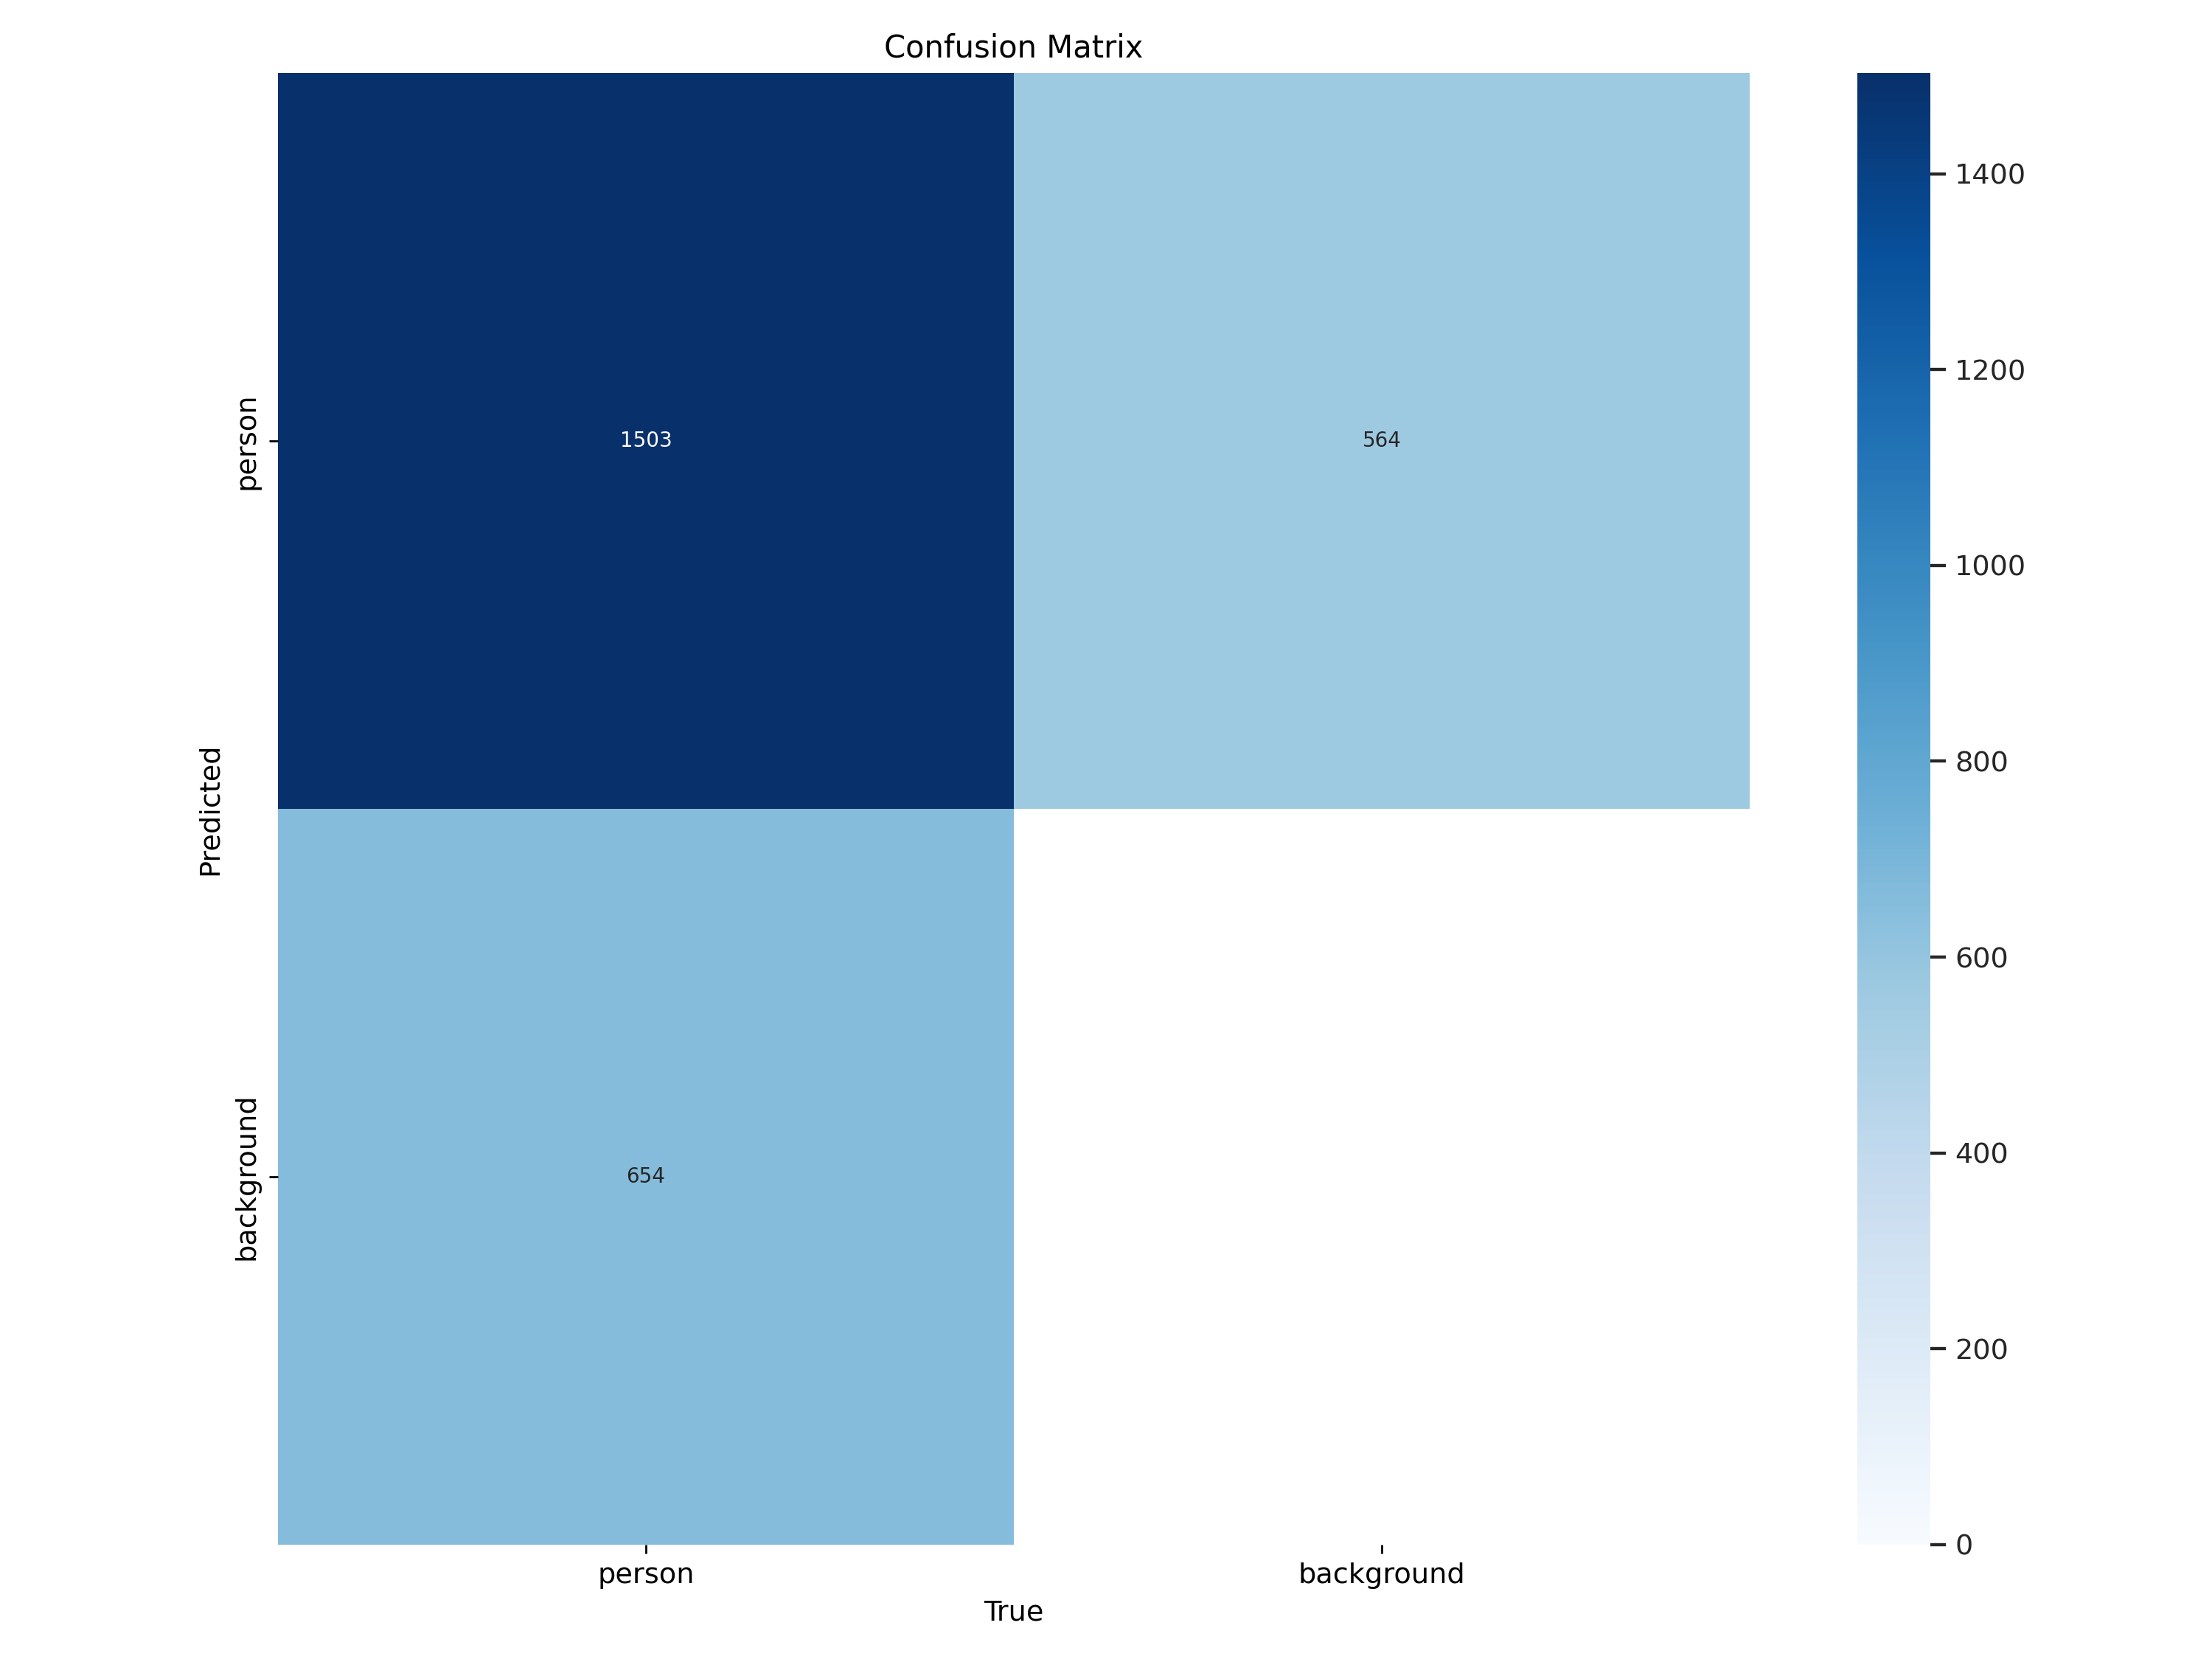

In [ ]:
#Confusion matrix is the chart that shows how the model handles different classes
Image(filename='/content/personDetection-yolov8/train/confusion_matrix.png', width=900)

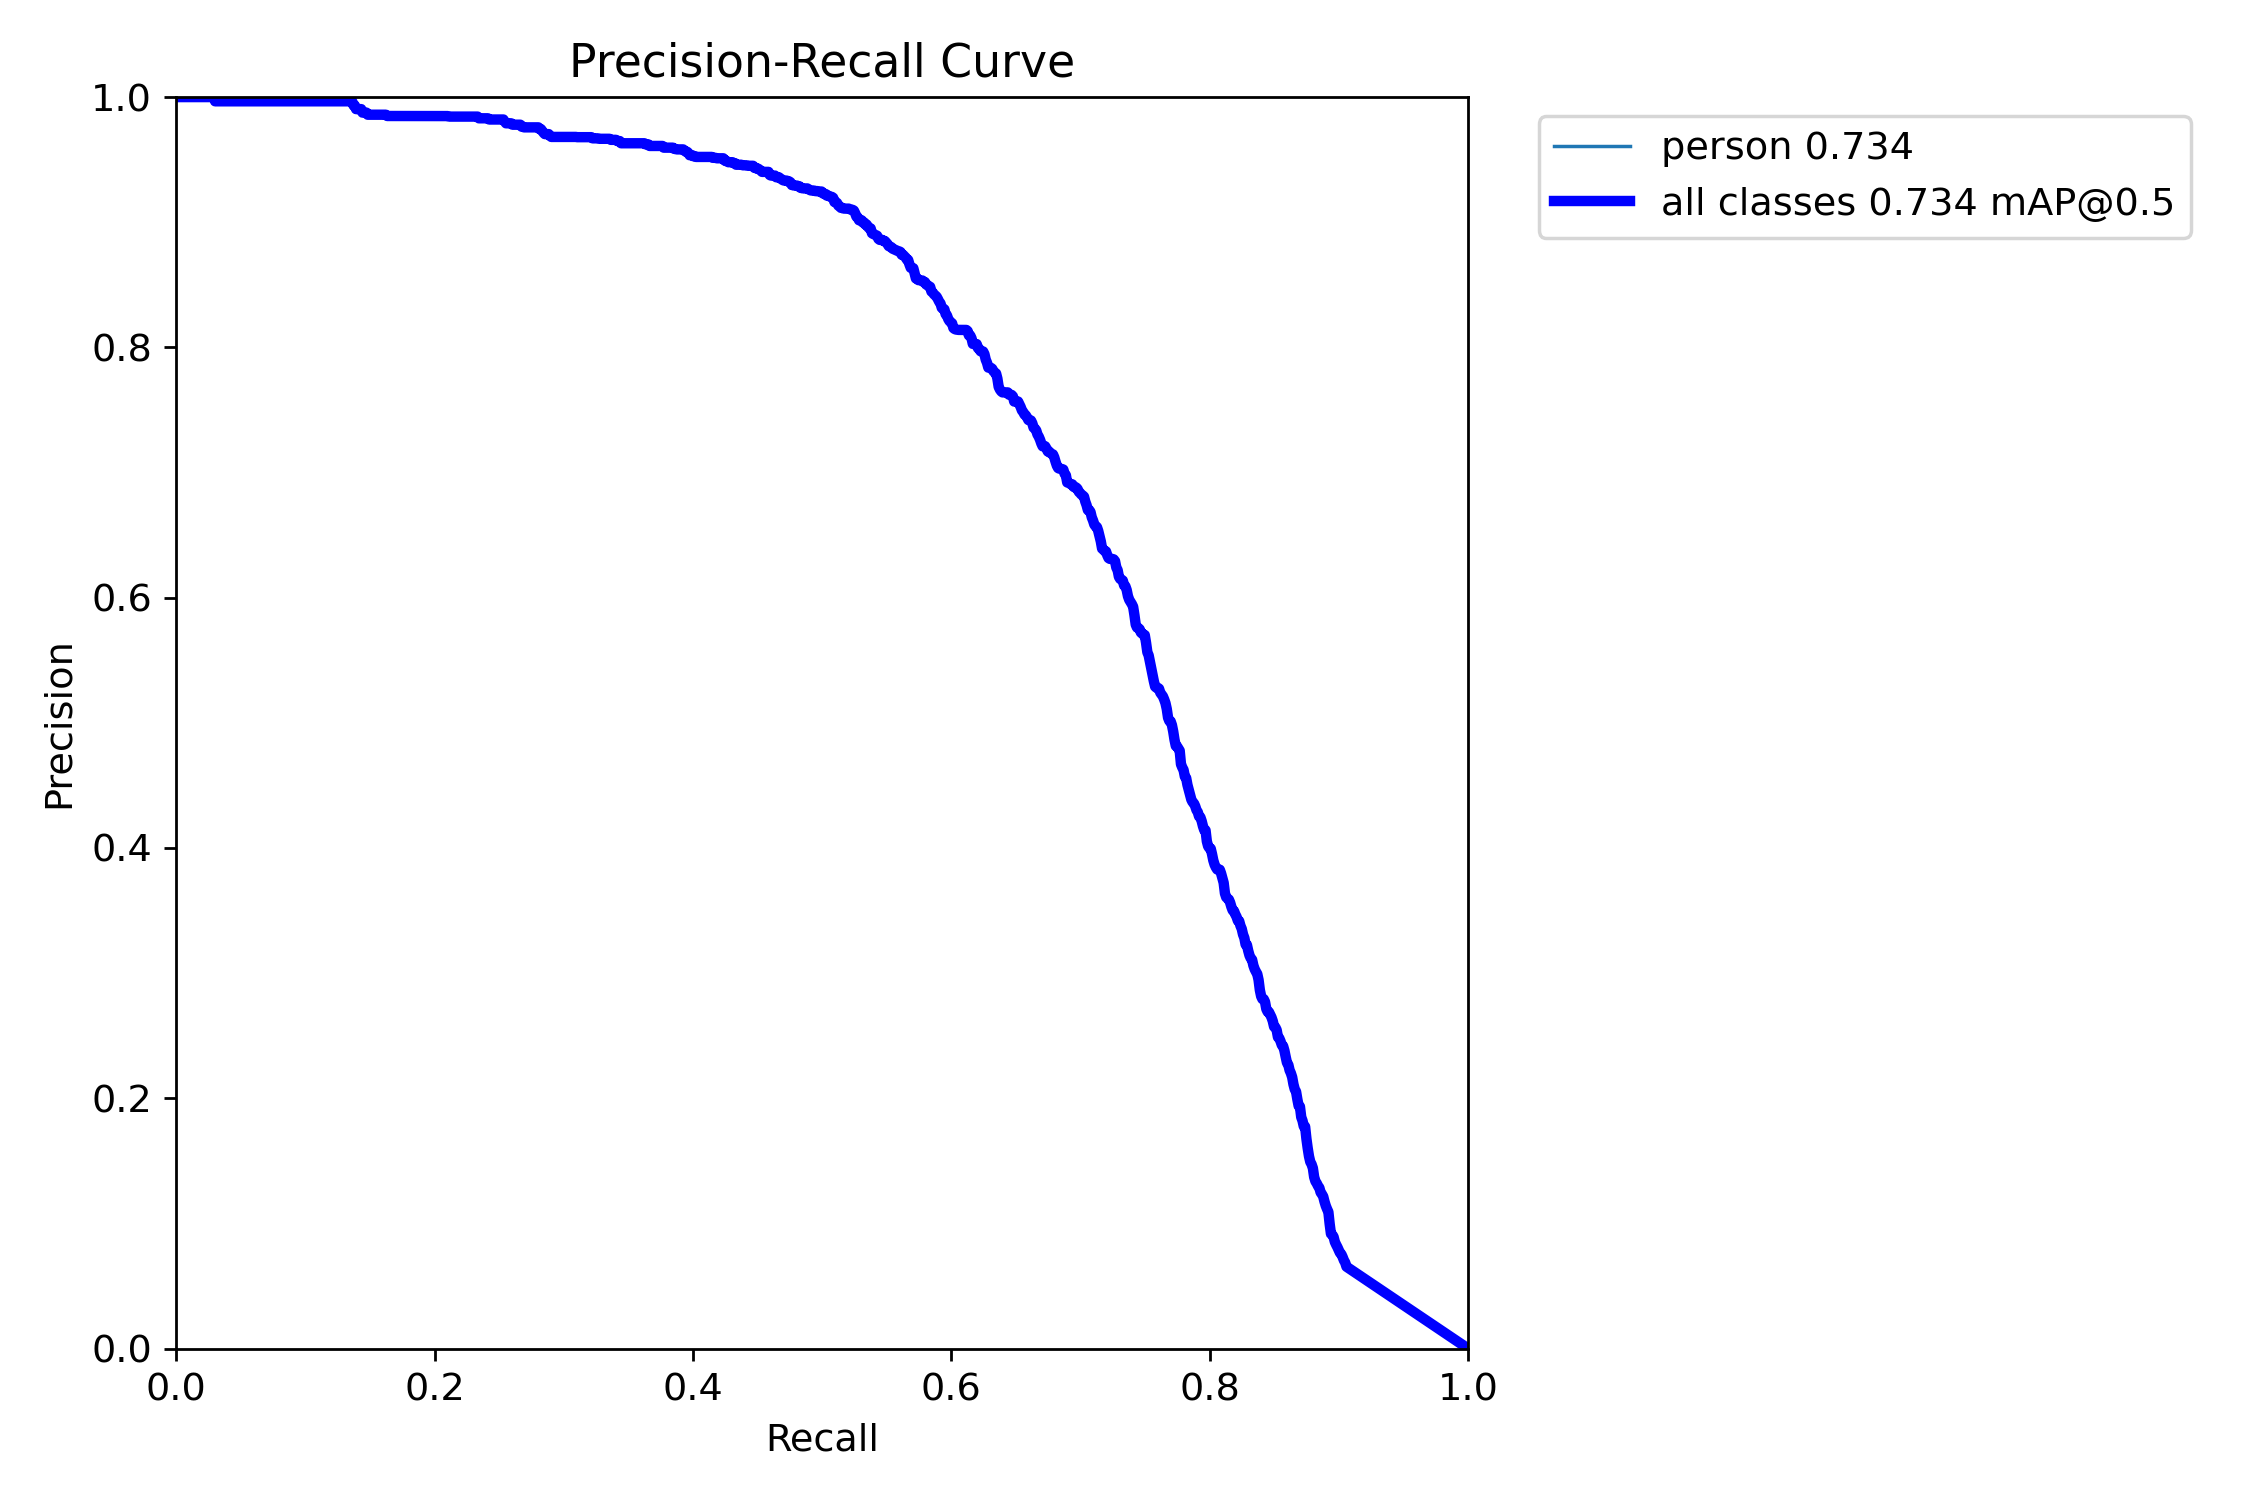

In [ ]:
Image(filename='/content/personDetection-yolov8/train/PR_curve.png', width=600)

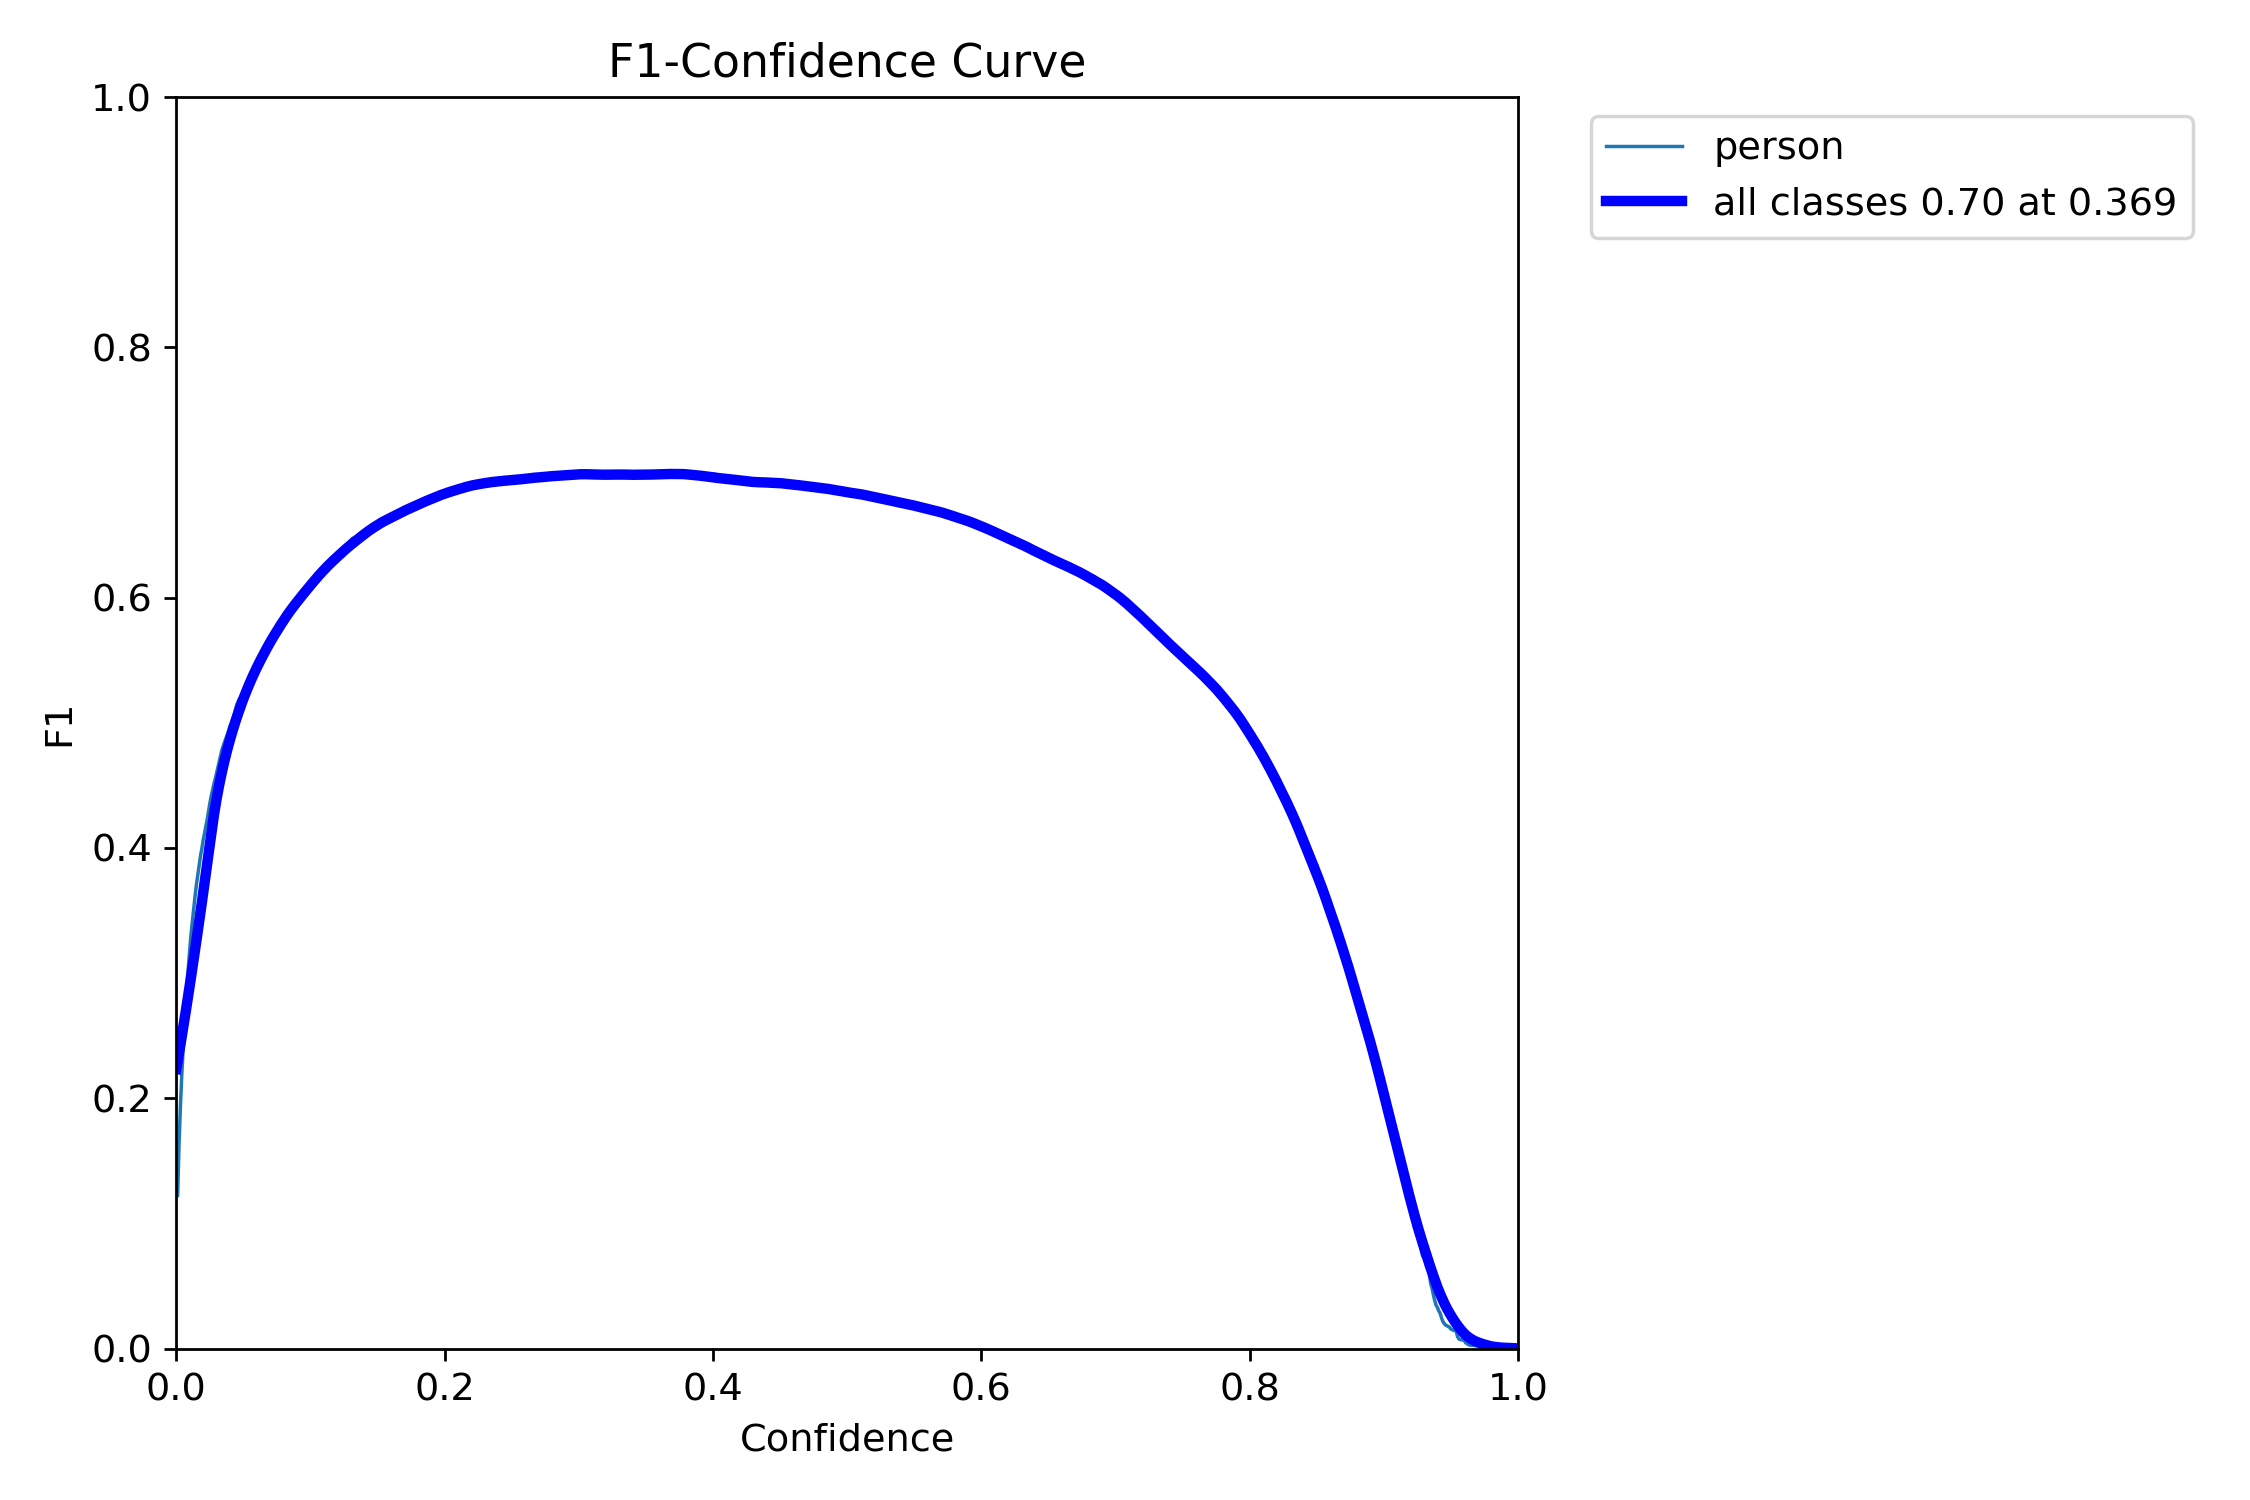

In [ ]:
Image(filename='/content/personDetection-yolov8/train/F1_curve.png', width=600)

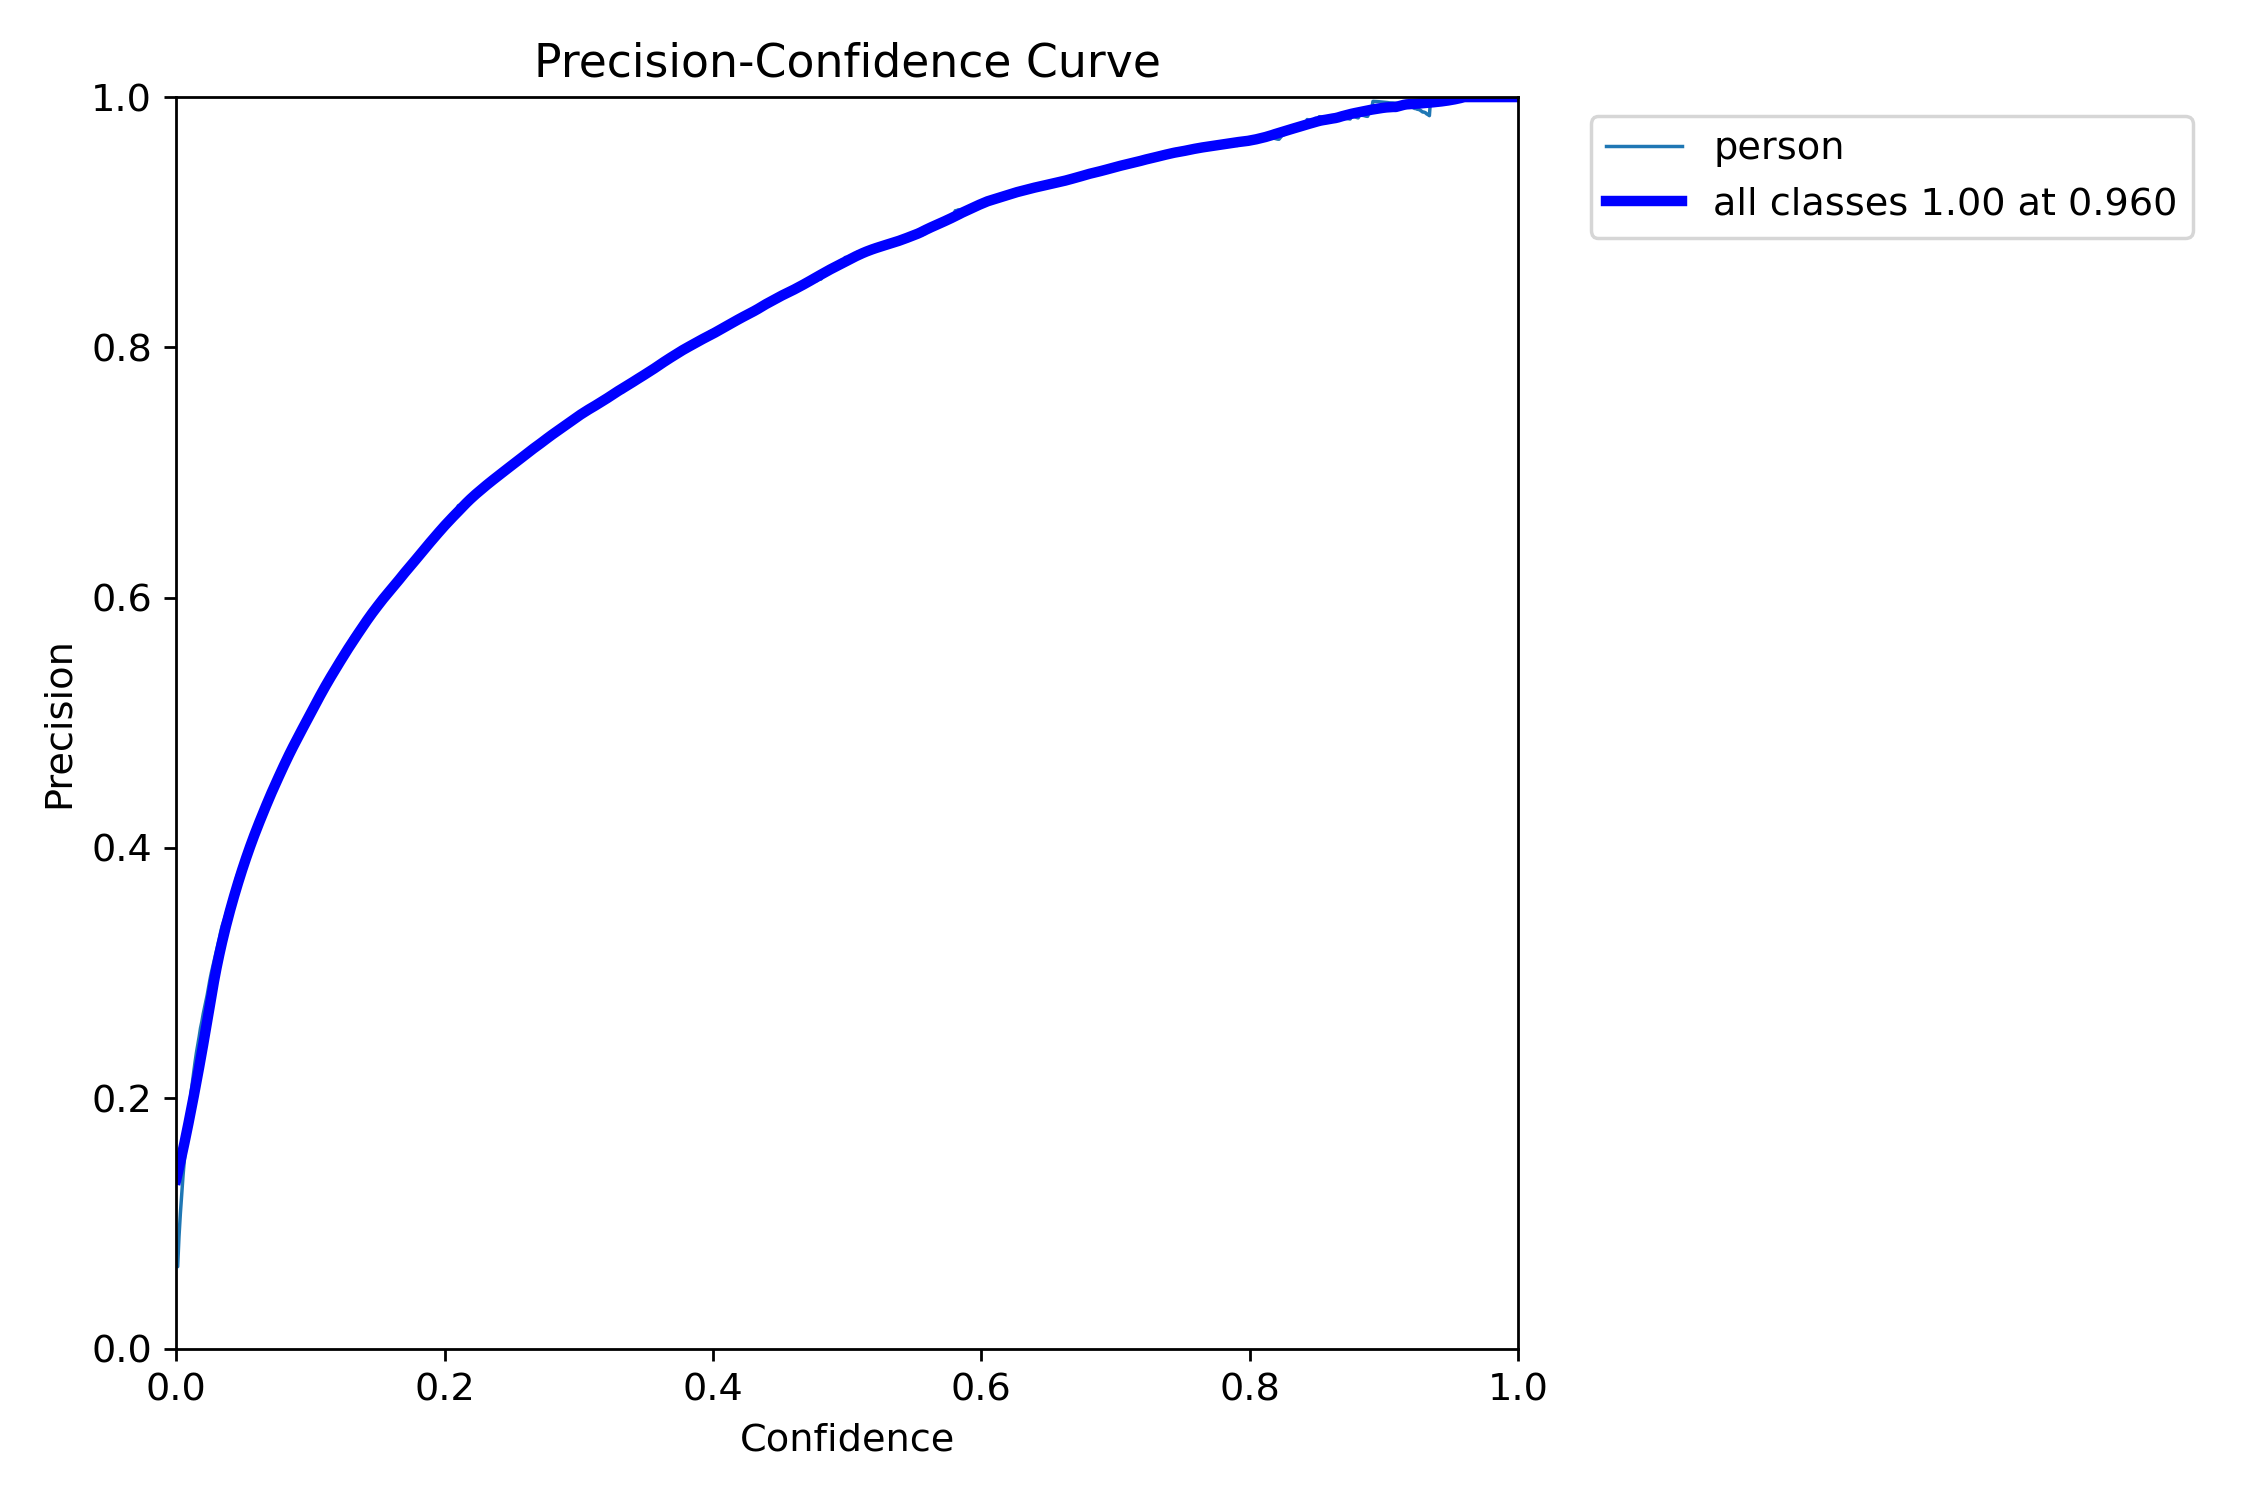

In [ ]:
Image(filename='/content/personDetection-yolov8/train/P_curve.png', width=600)

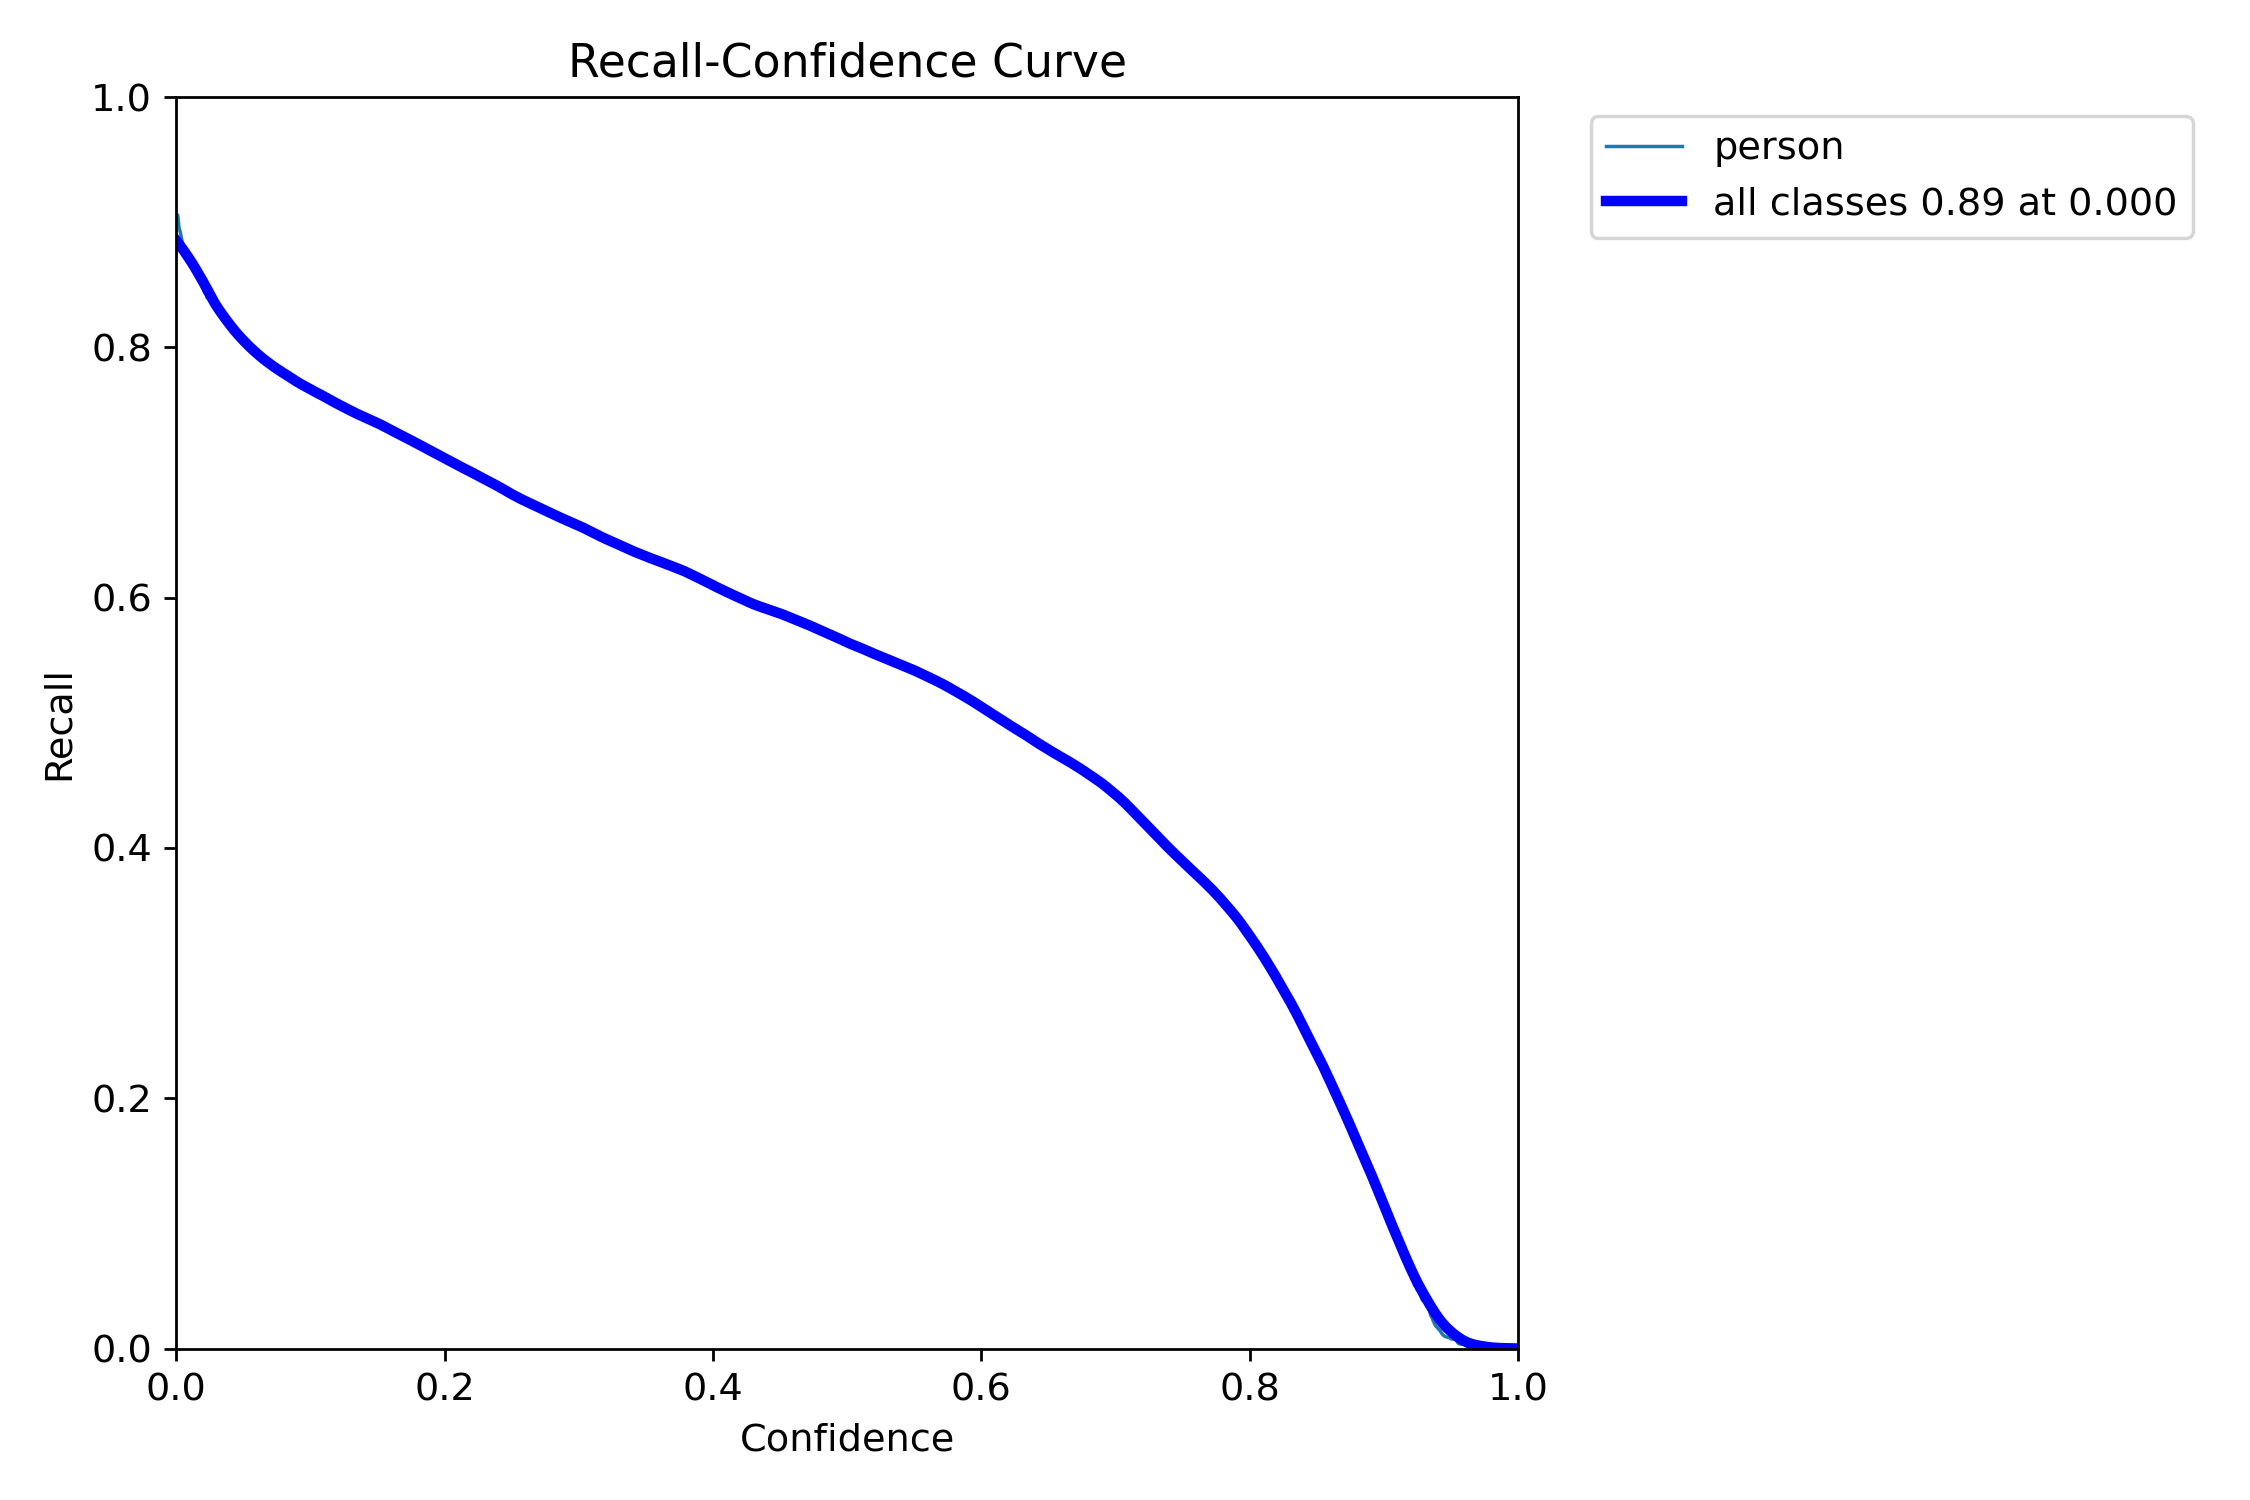

In [ ]:
Image(filename='/content/personDetection-yolov8/train/R_curve.png', width=600)

#**Training and Validation Loss**

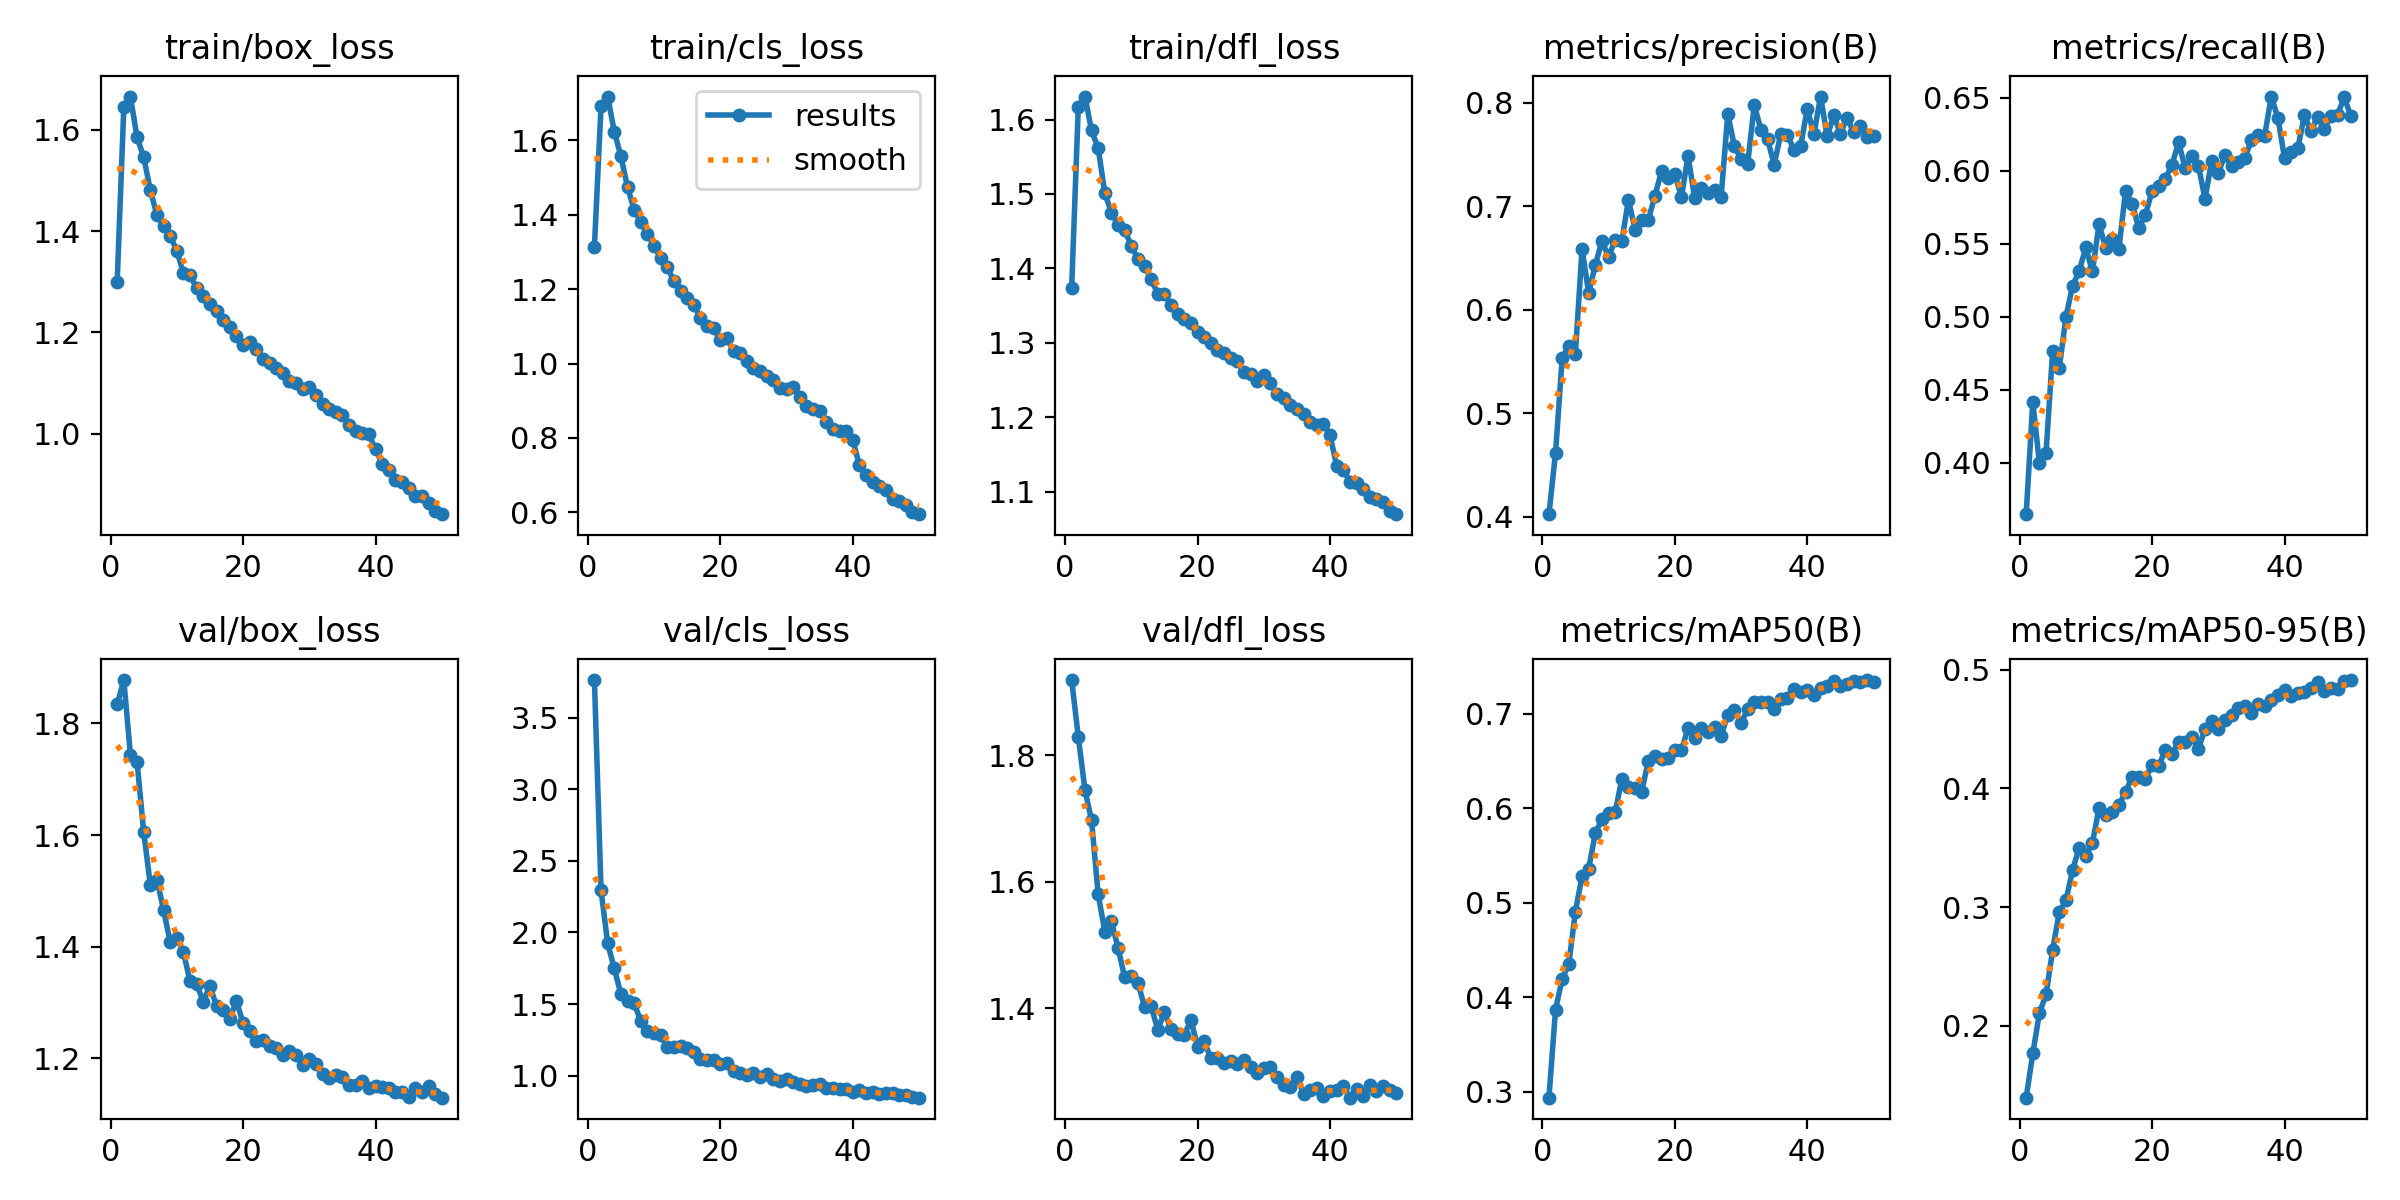

In [ ]:
# graph of the training and validation loss

Image(filename='/content/personDetection-yolov8/train/results.png', width=600)

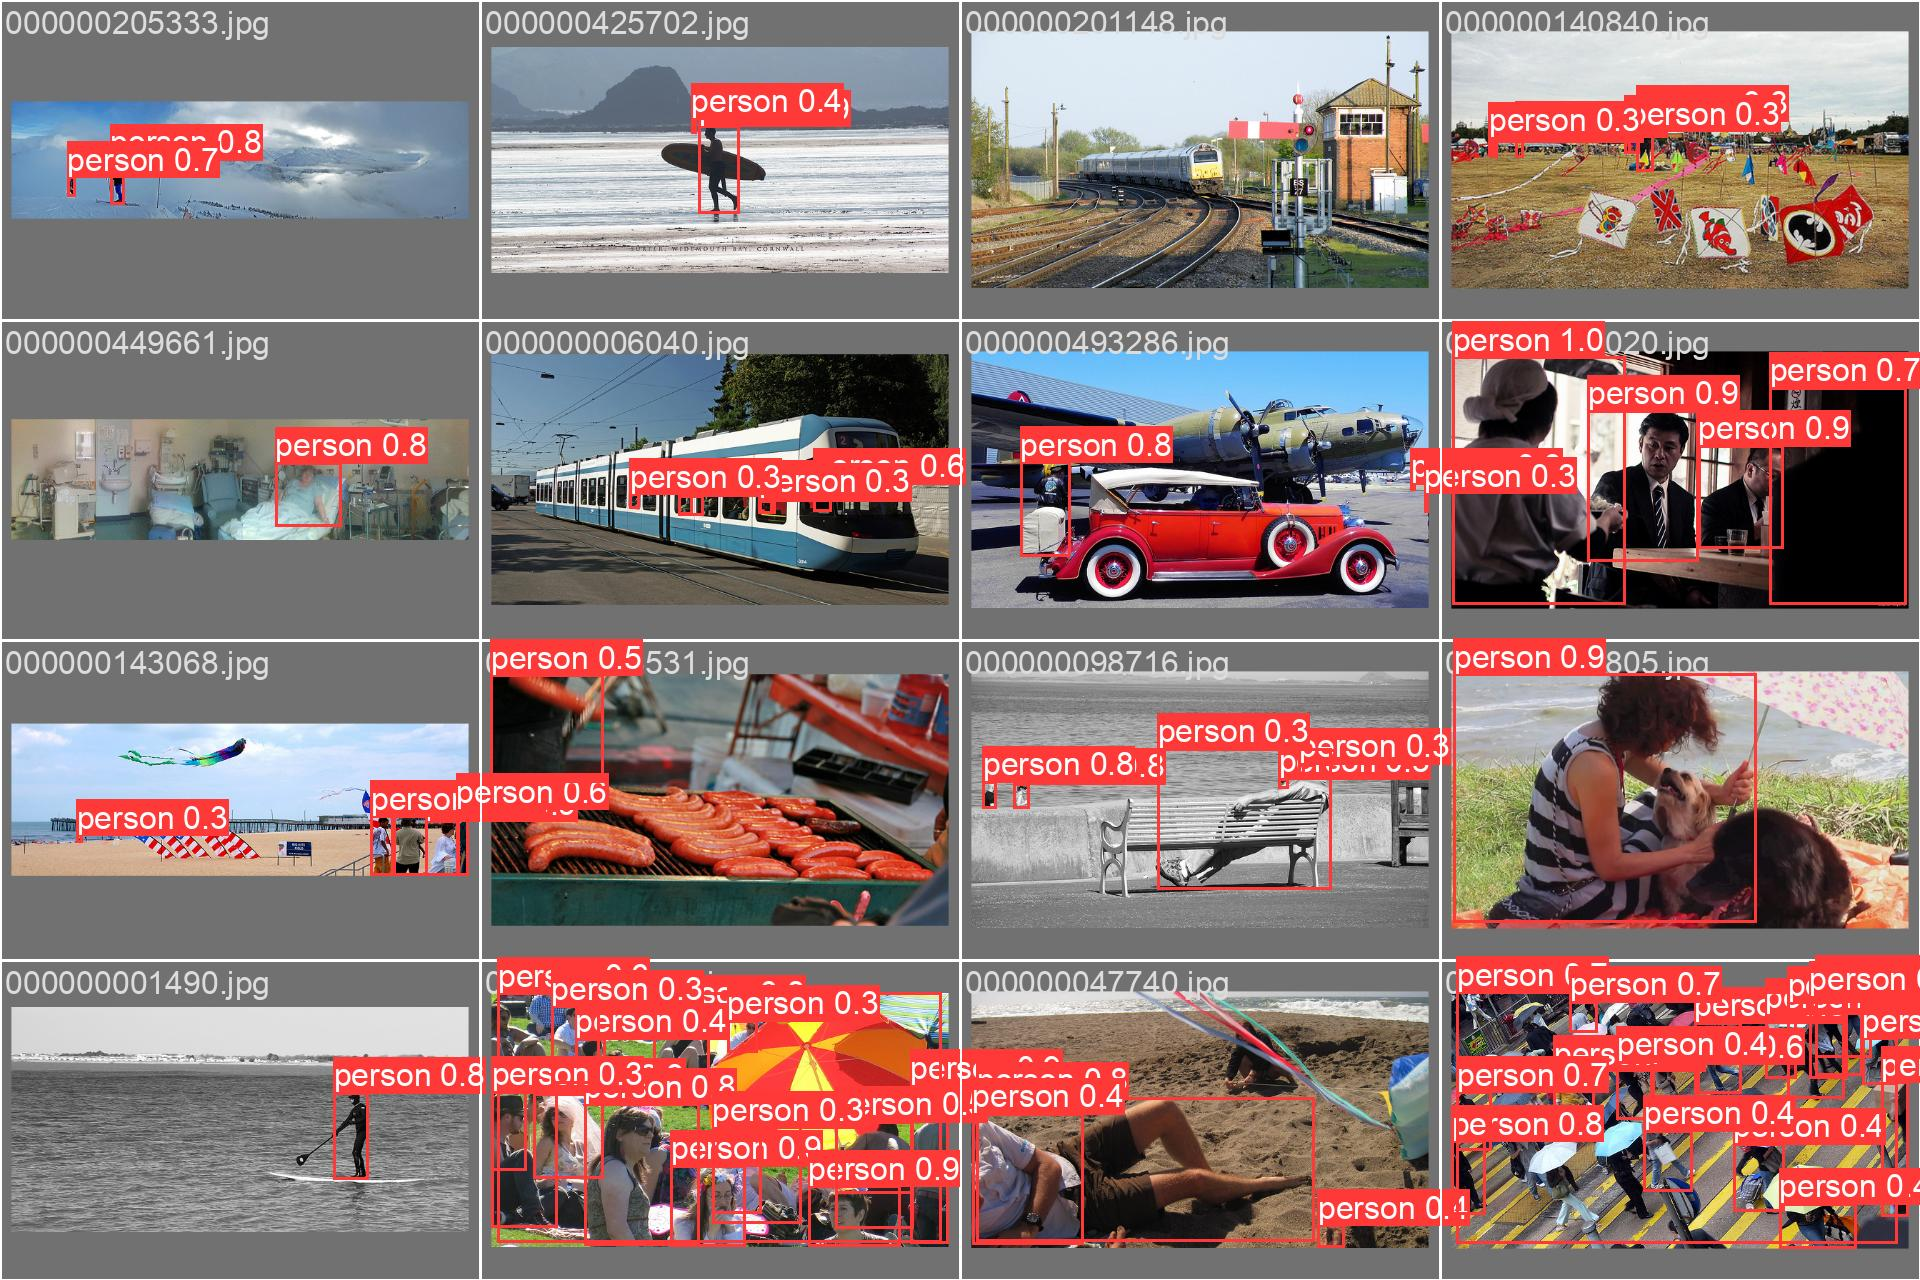

In [ ]:
#Model Prediction on validation batch
Image(filename='/content/personDetection-yolov8/train/val_batch0_pred.jpg', width=600)

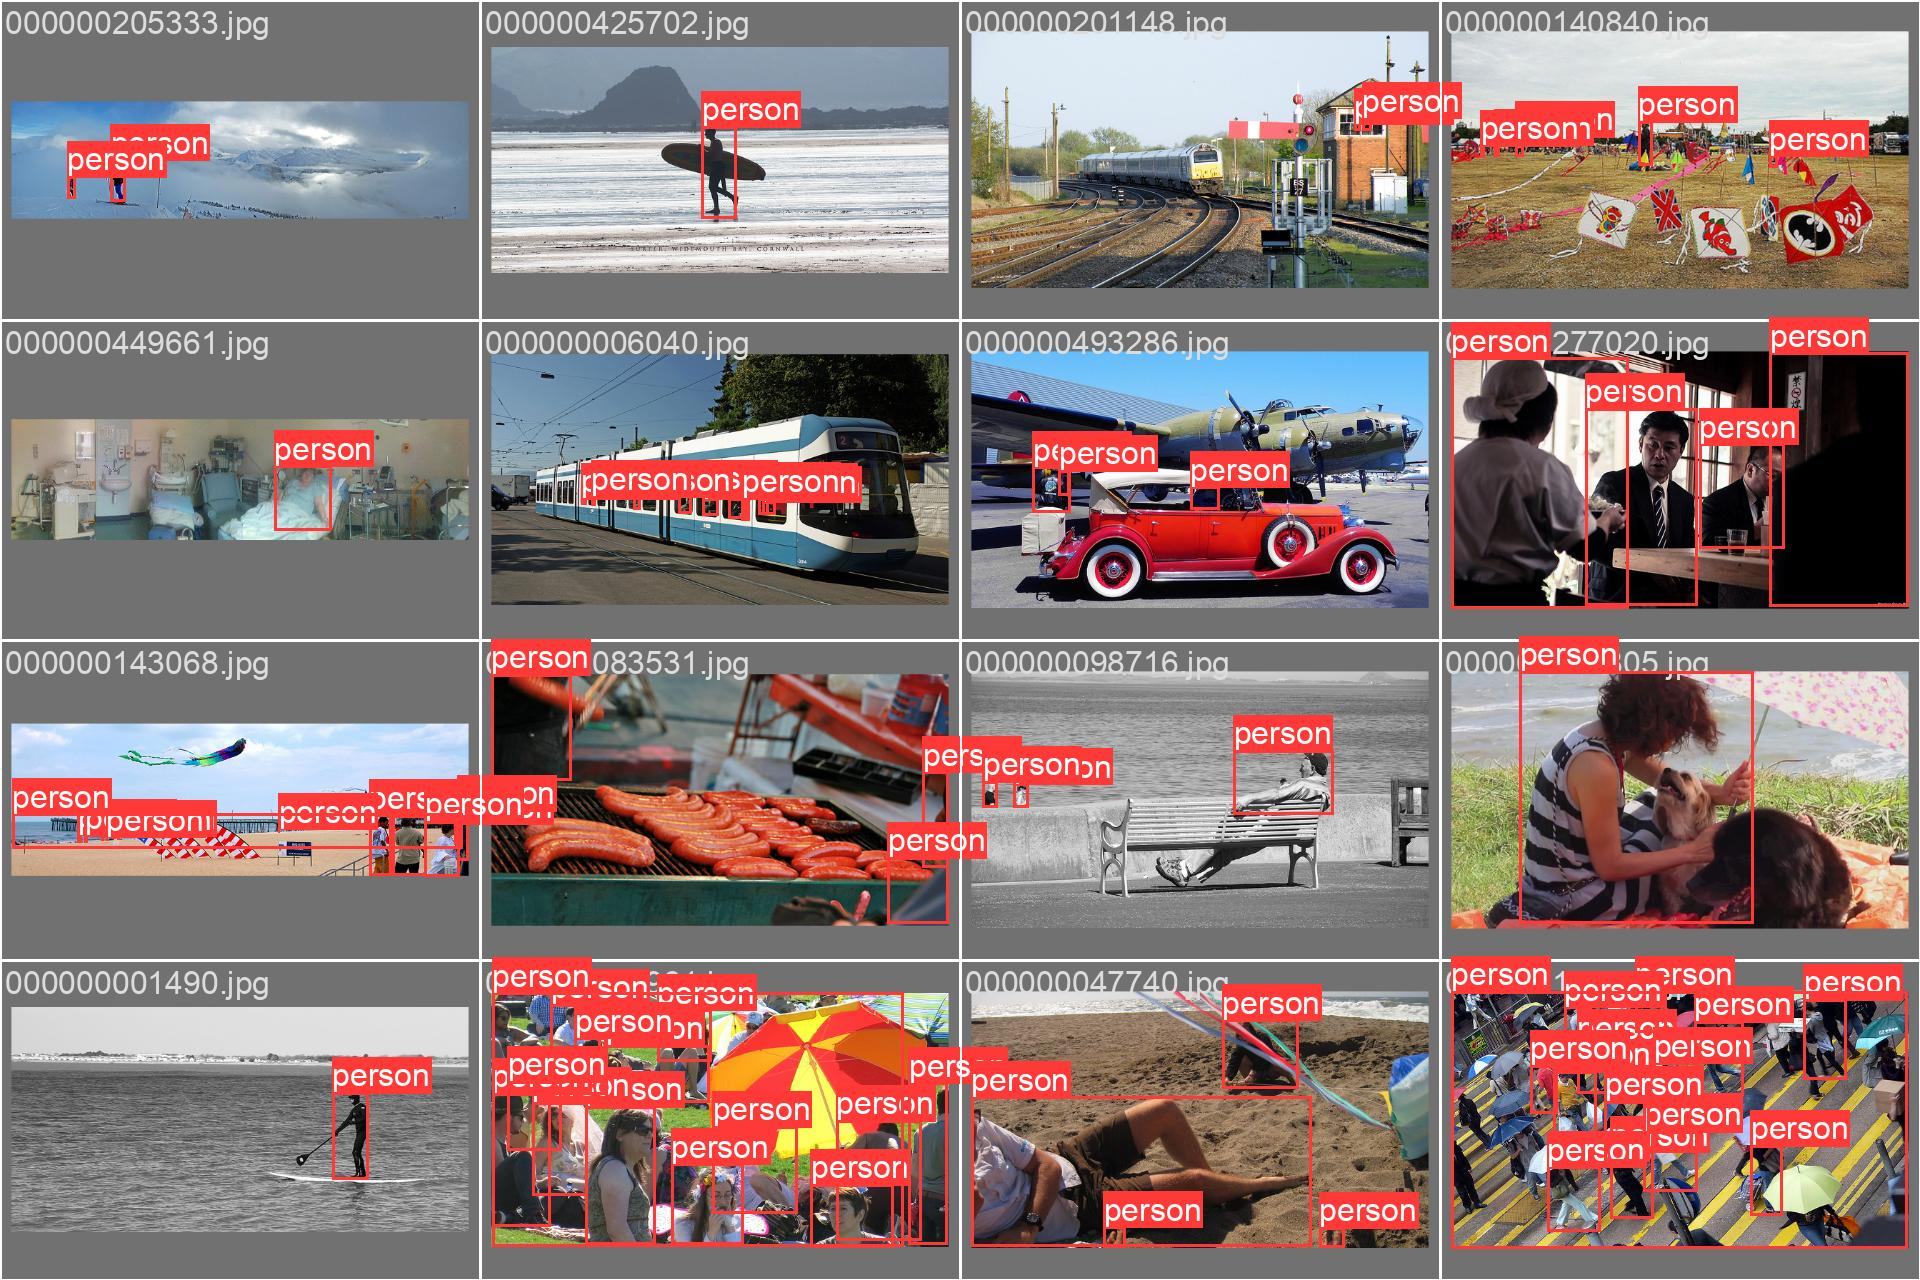

In [ ]:
Image(filename='/content/personDetection-yolov8/train/val_batch0_labels.jpg', width=600)

#**Confusion matrix (test)**

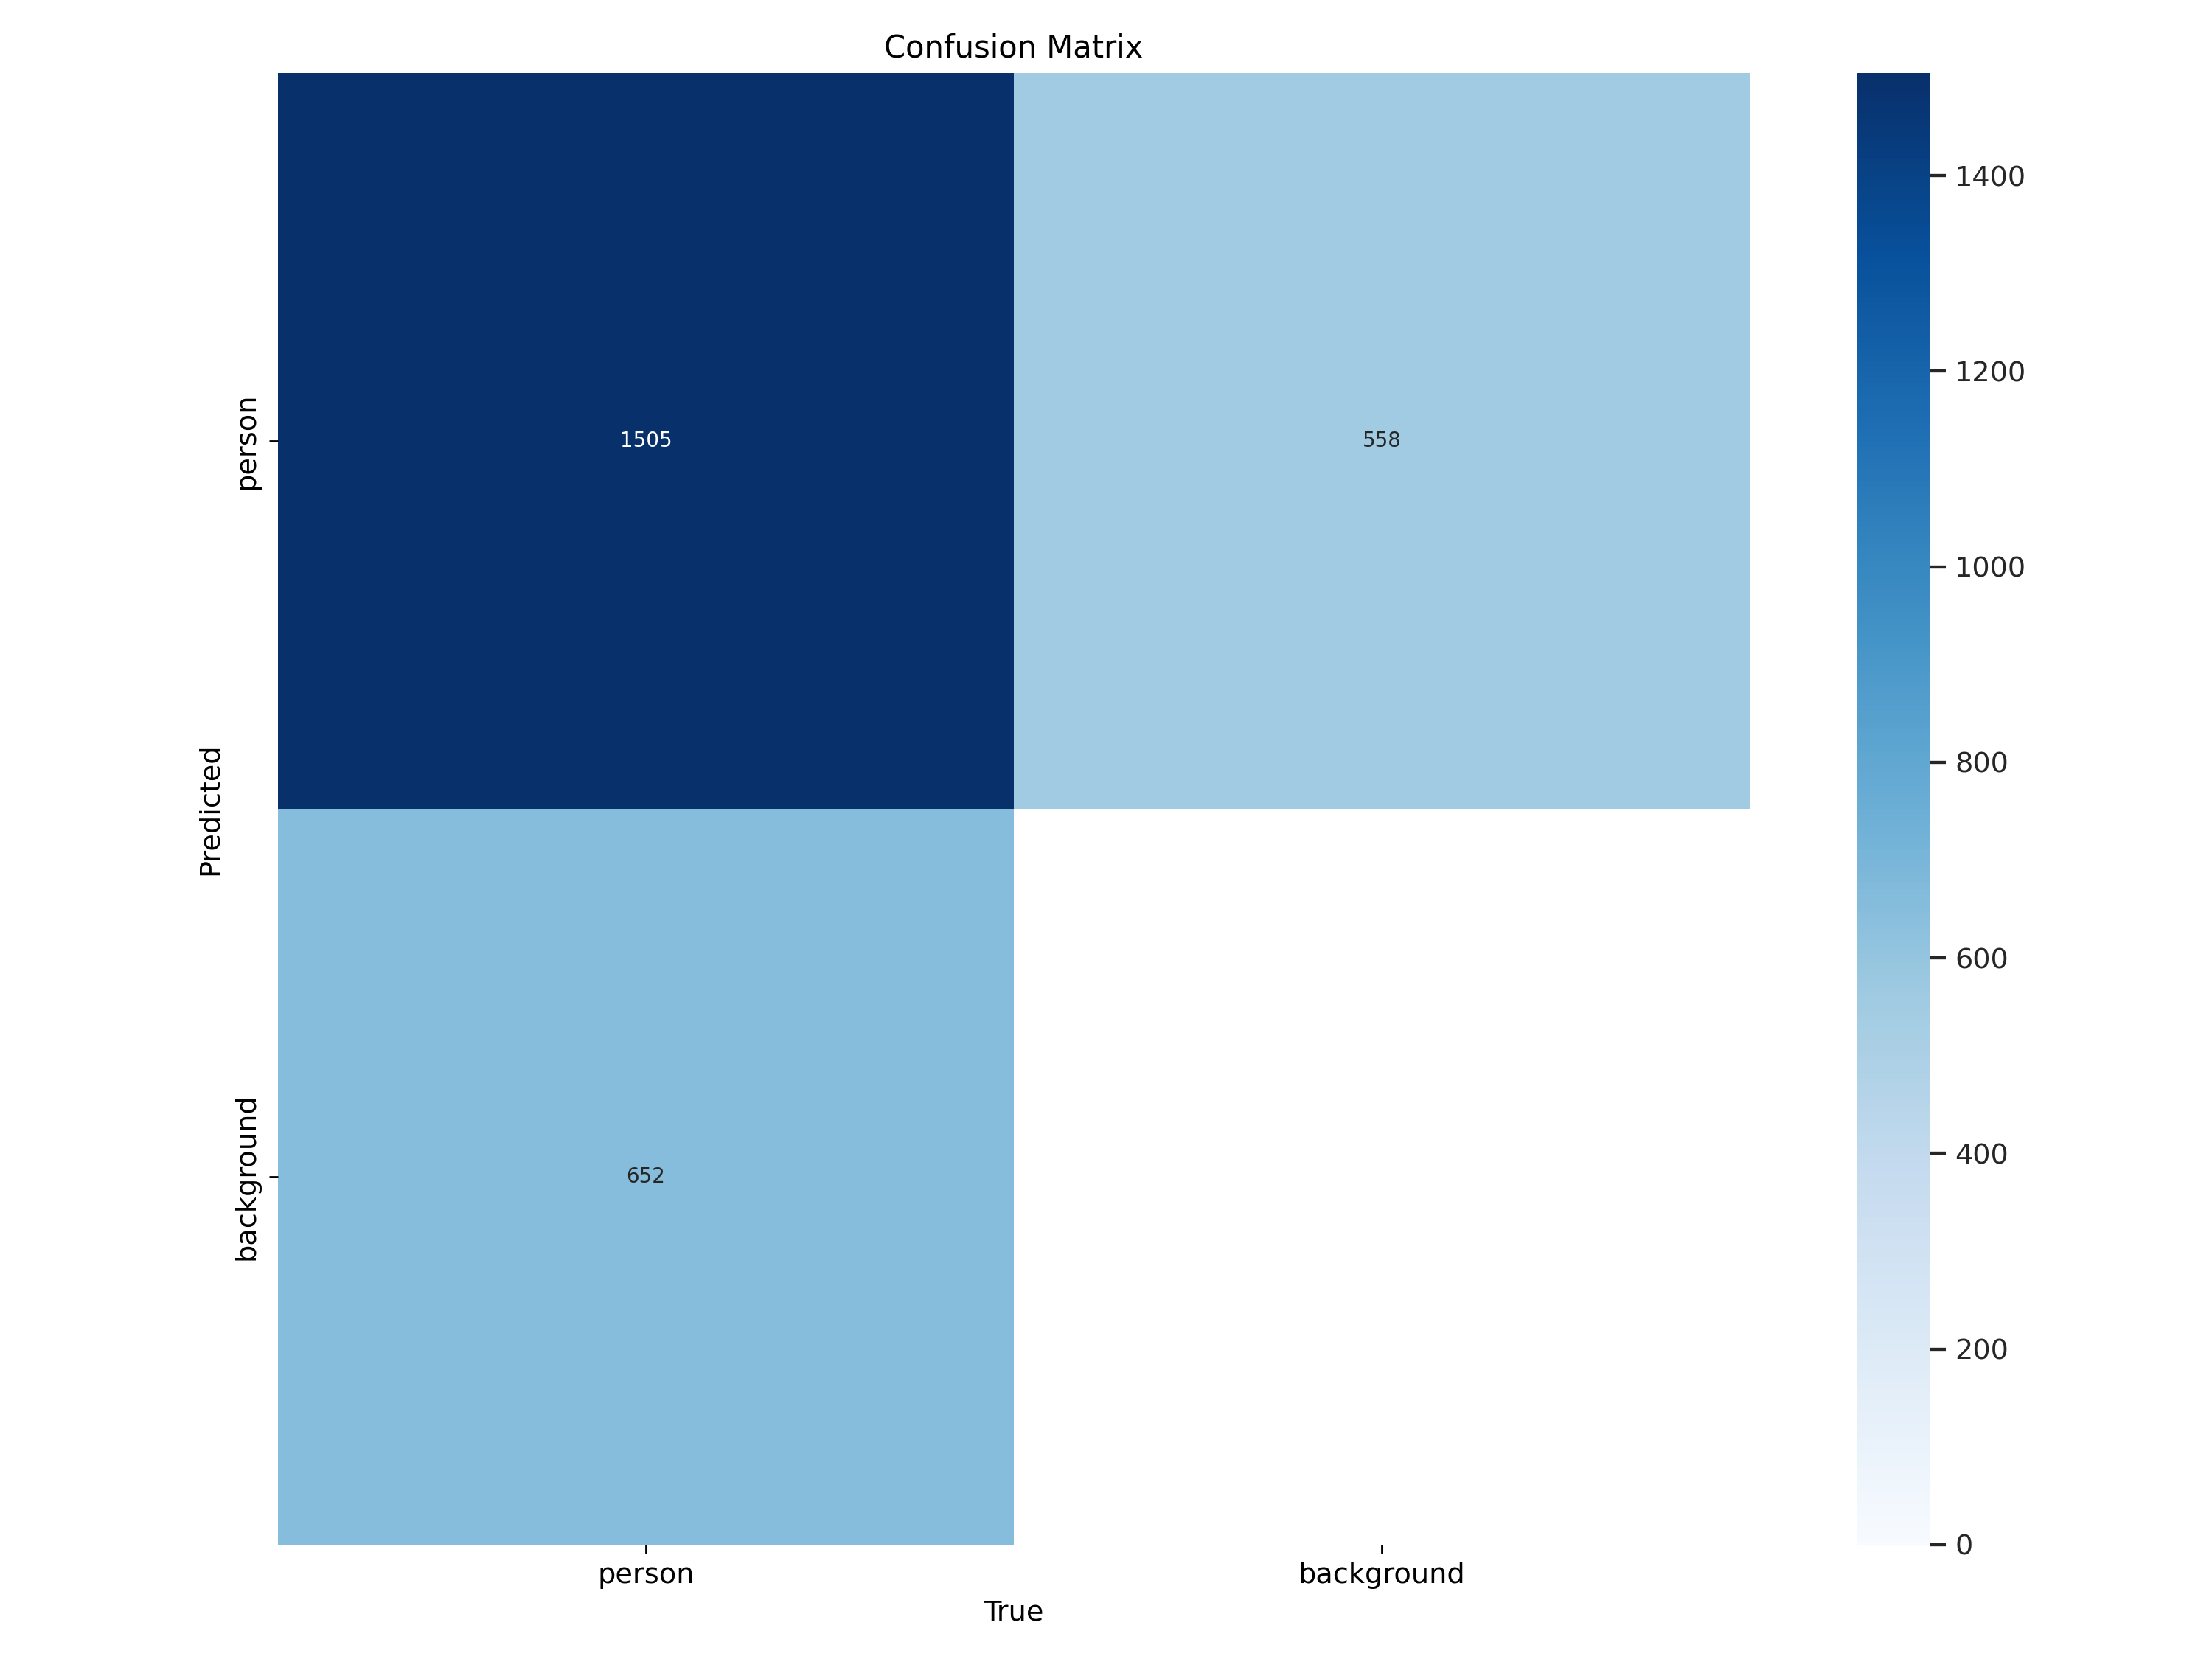

In [ ]:
#Confusion matrix is the chart that shows how the model handles different classes
Image(filename='/content/personDetection-yolov8/train2/confusion_matrix.png', width=900)

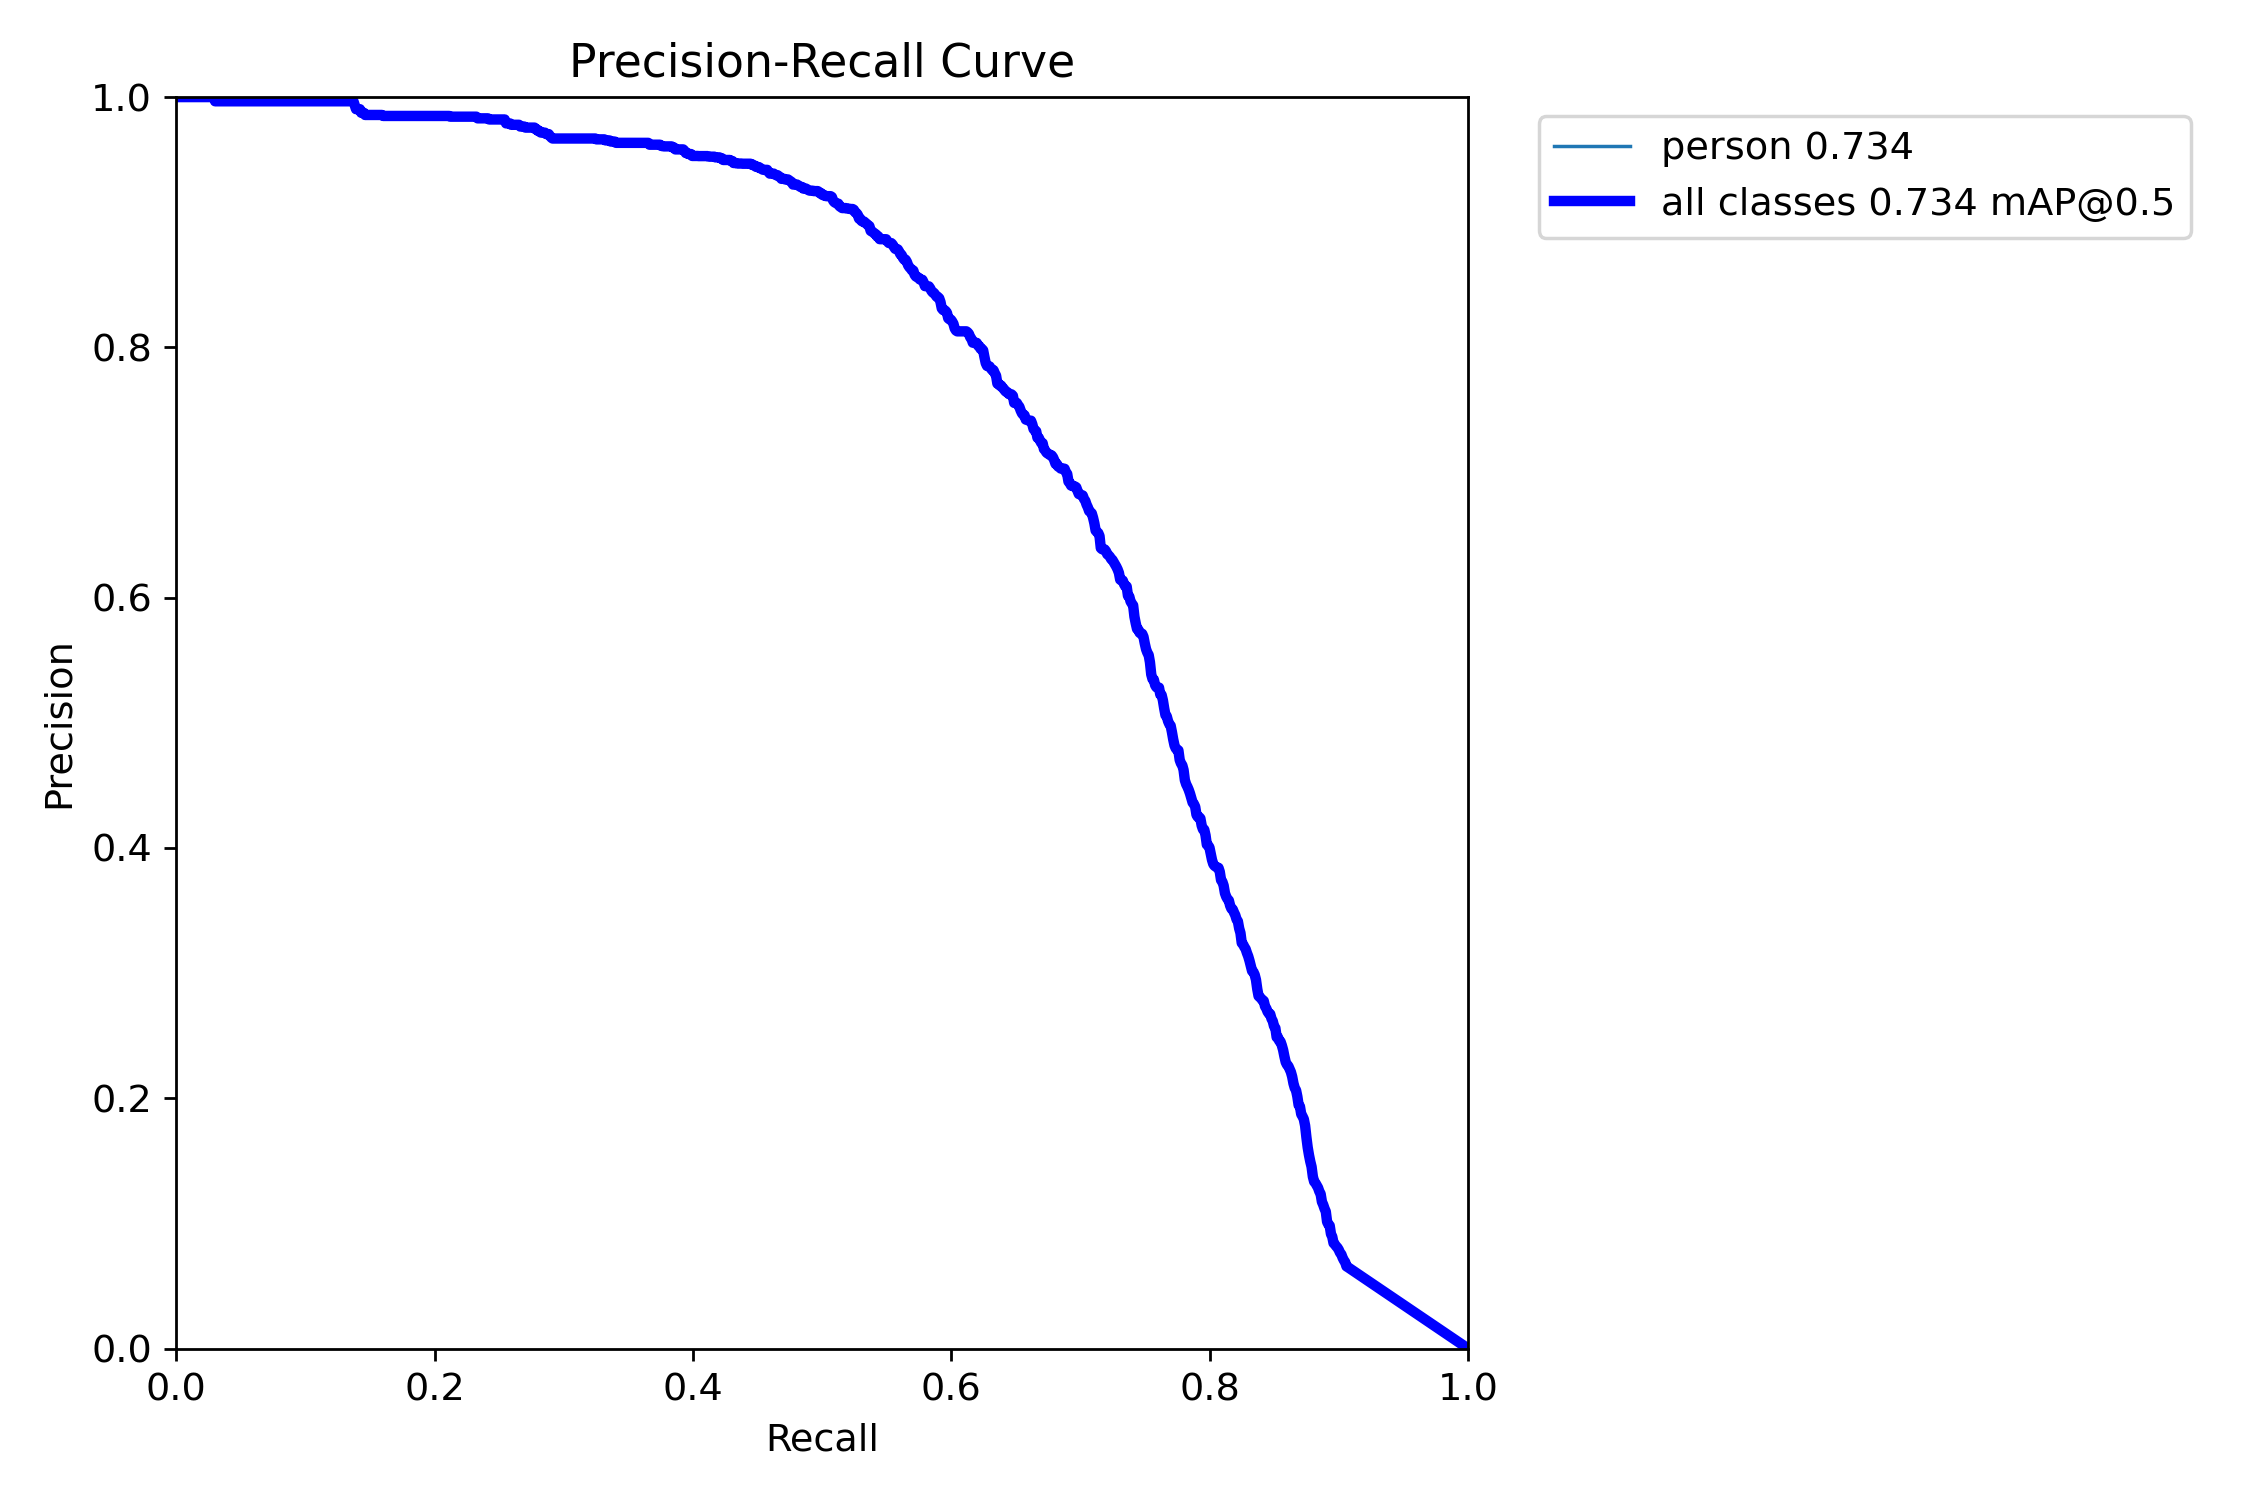

In [ ]:
Image(filename='/content/personDetection-yolov8/train2/PR_curve.png', width=600)

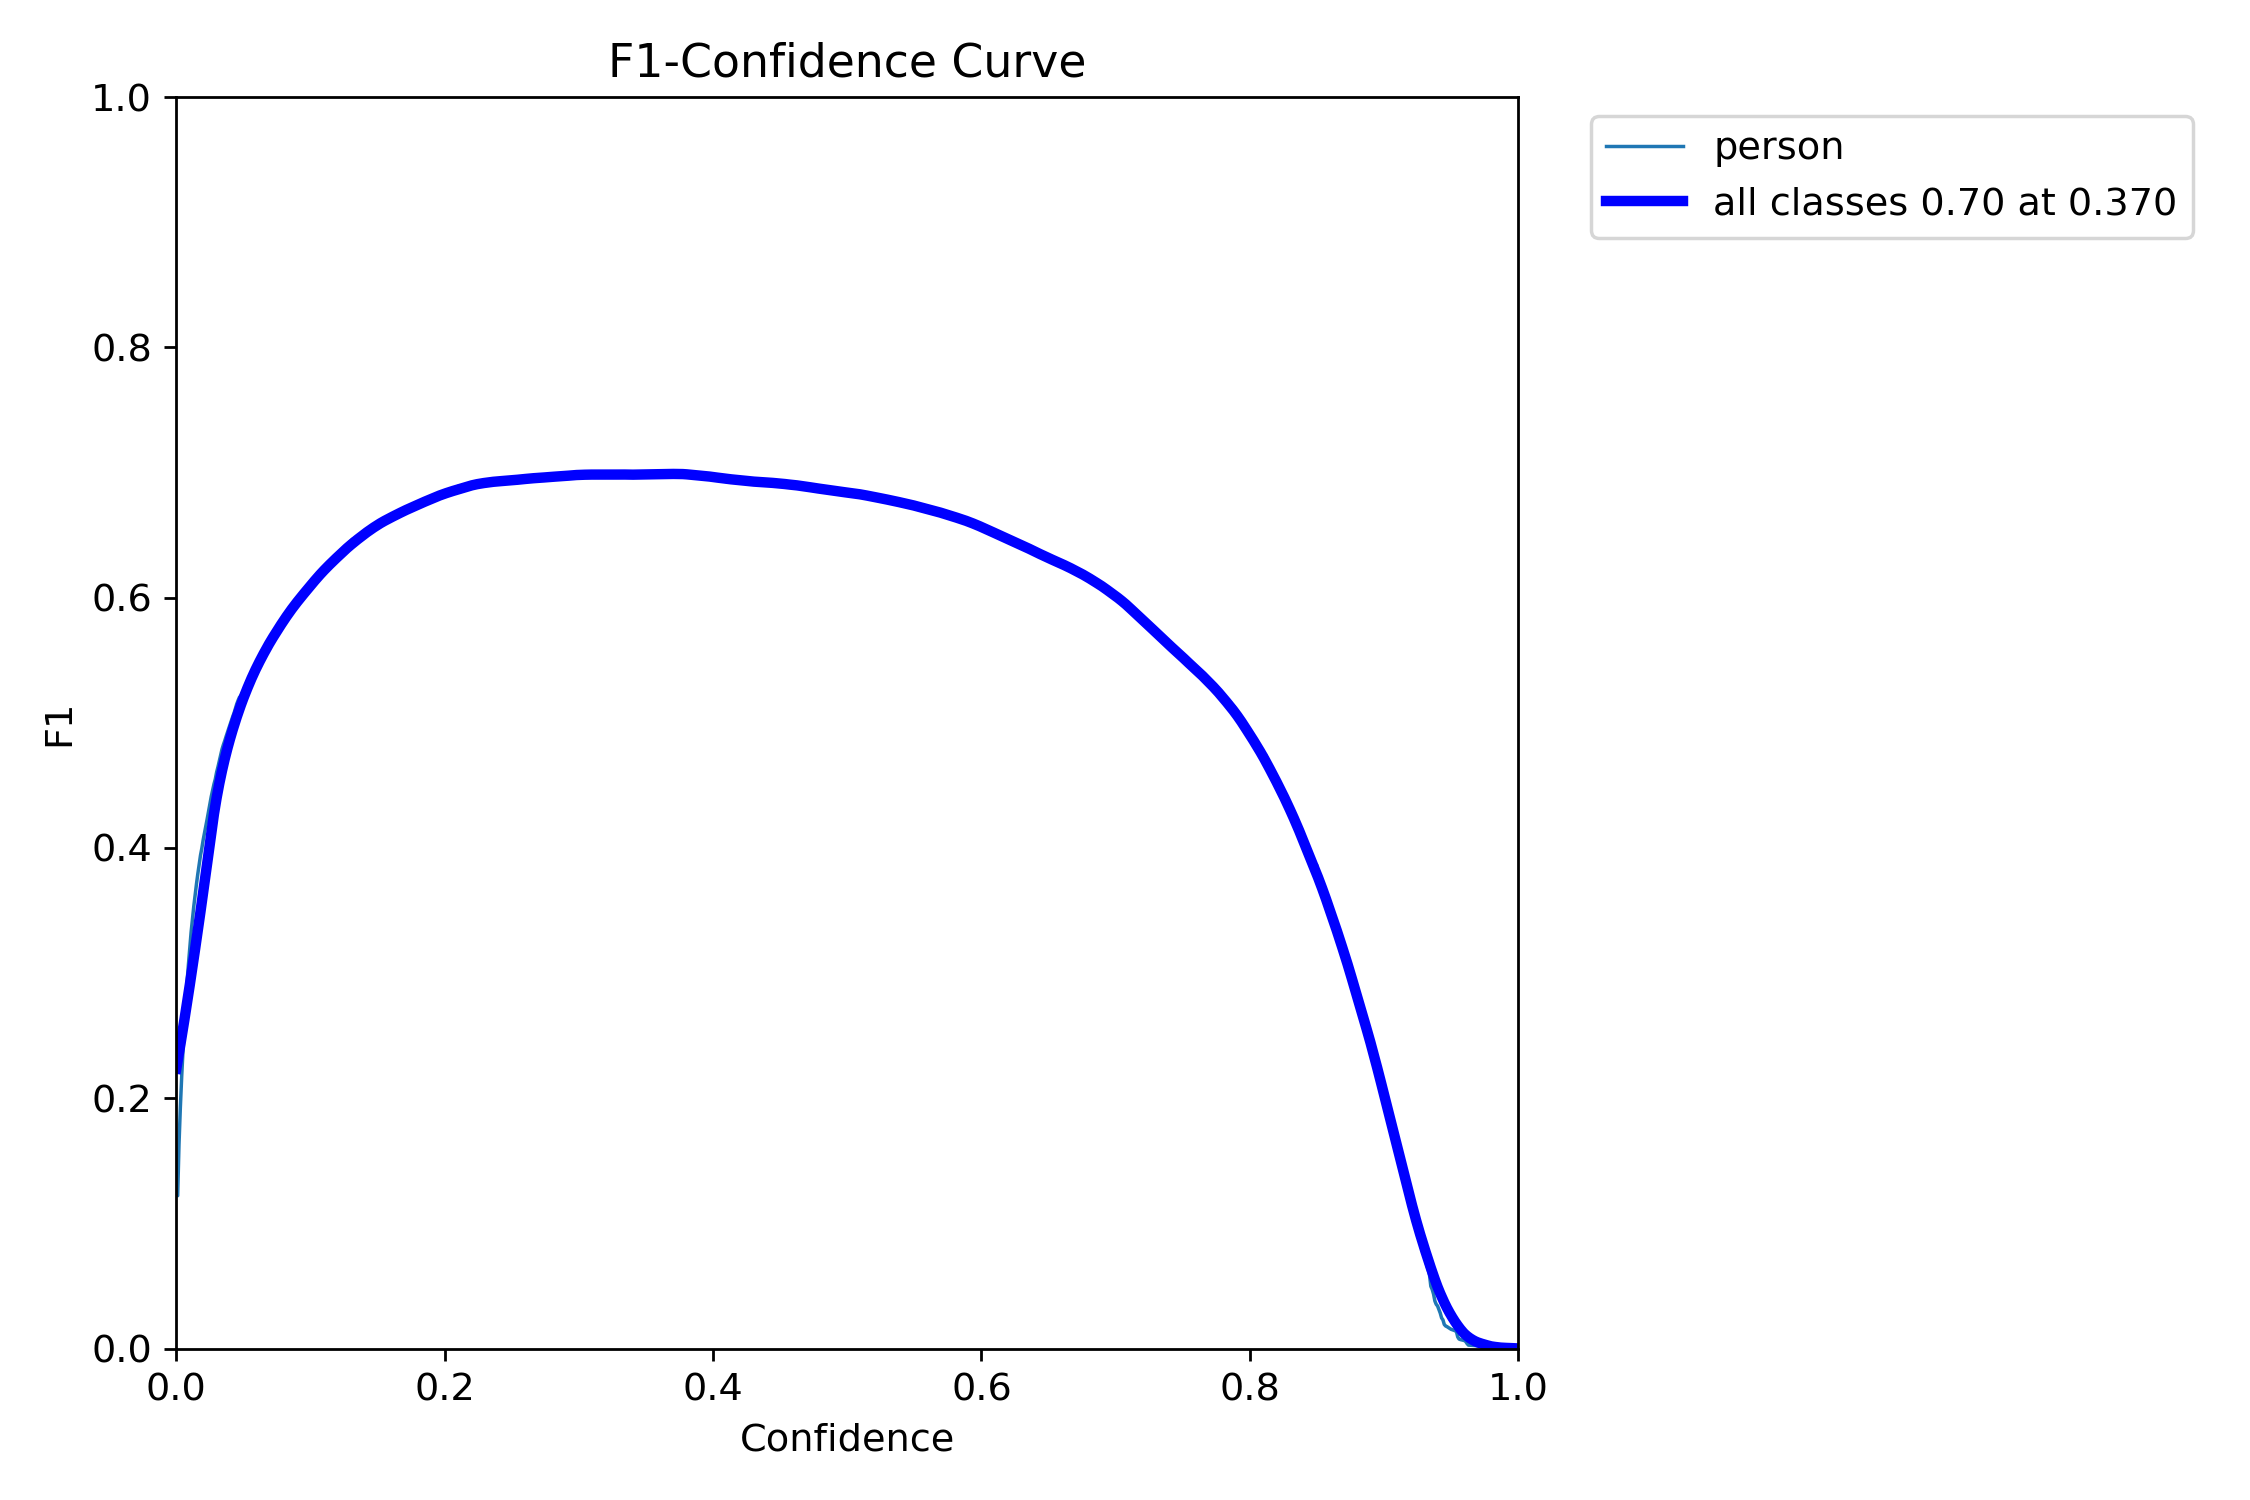

In [ ]:
Image(filename='/content/personDetection-yolov8/train2/F1_curve.png', width=600)

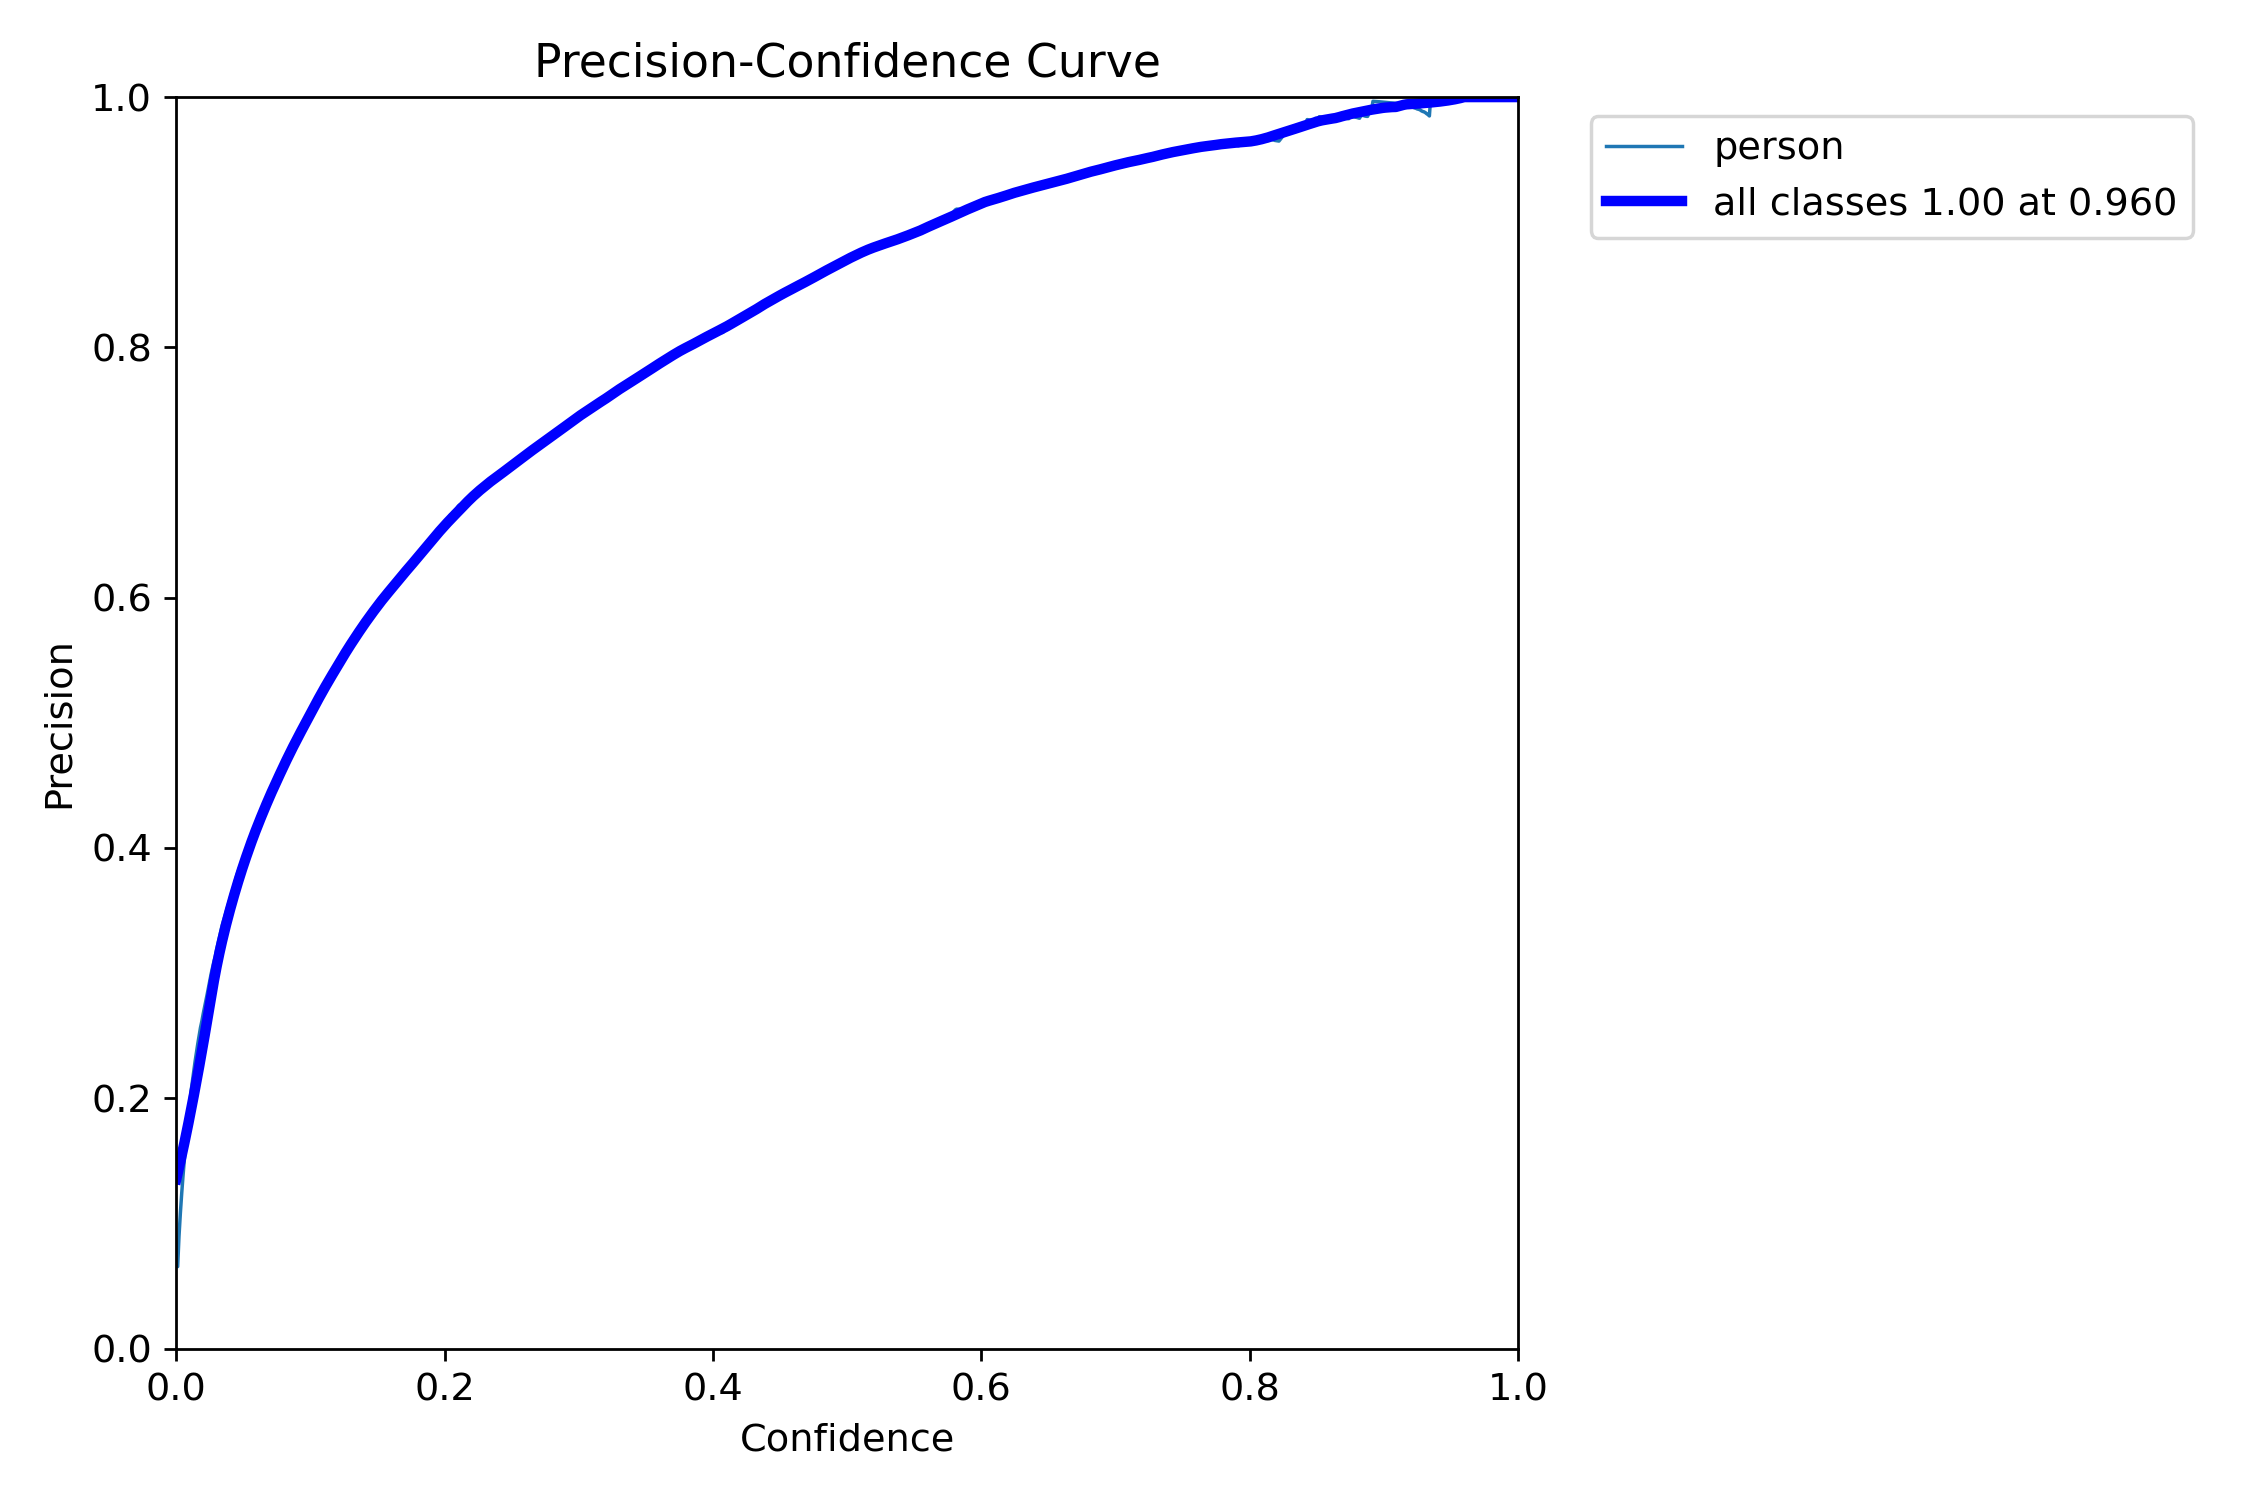

In [ ]:
Image(filename='/content/personDetection-yolov8/train2/P_curve.png', width=600)

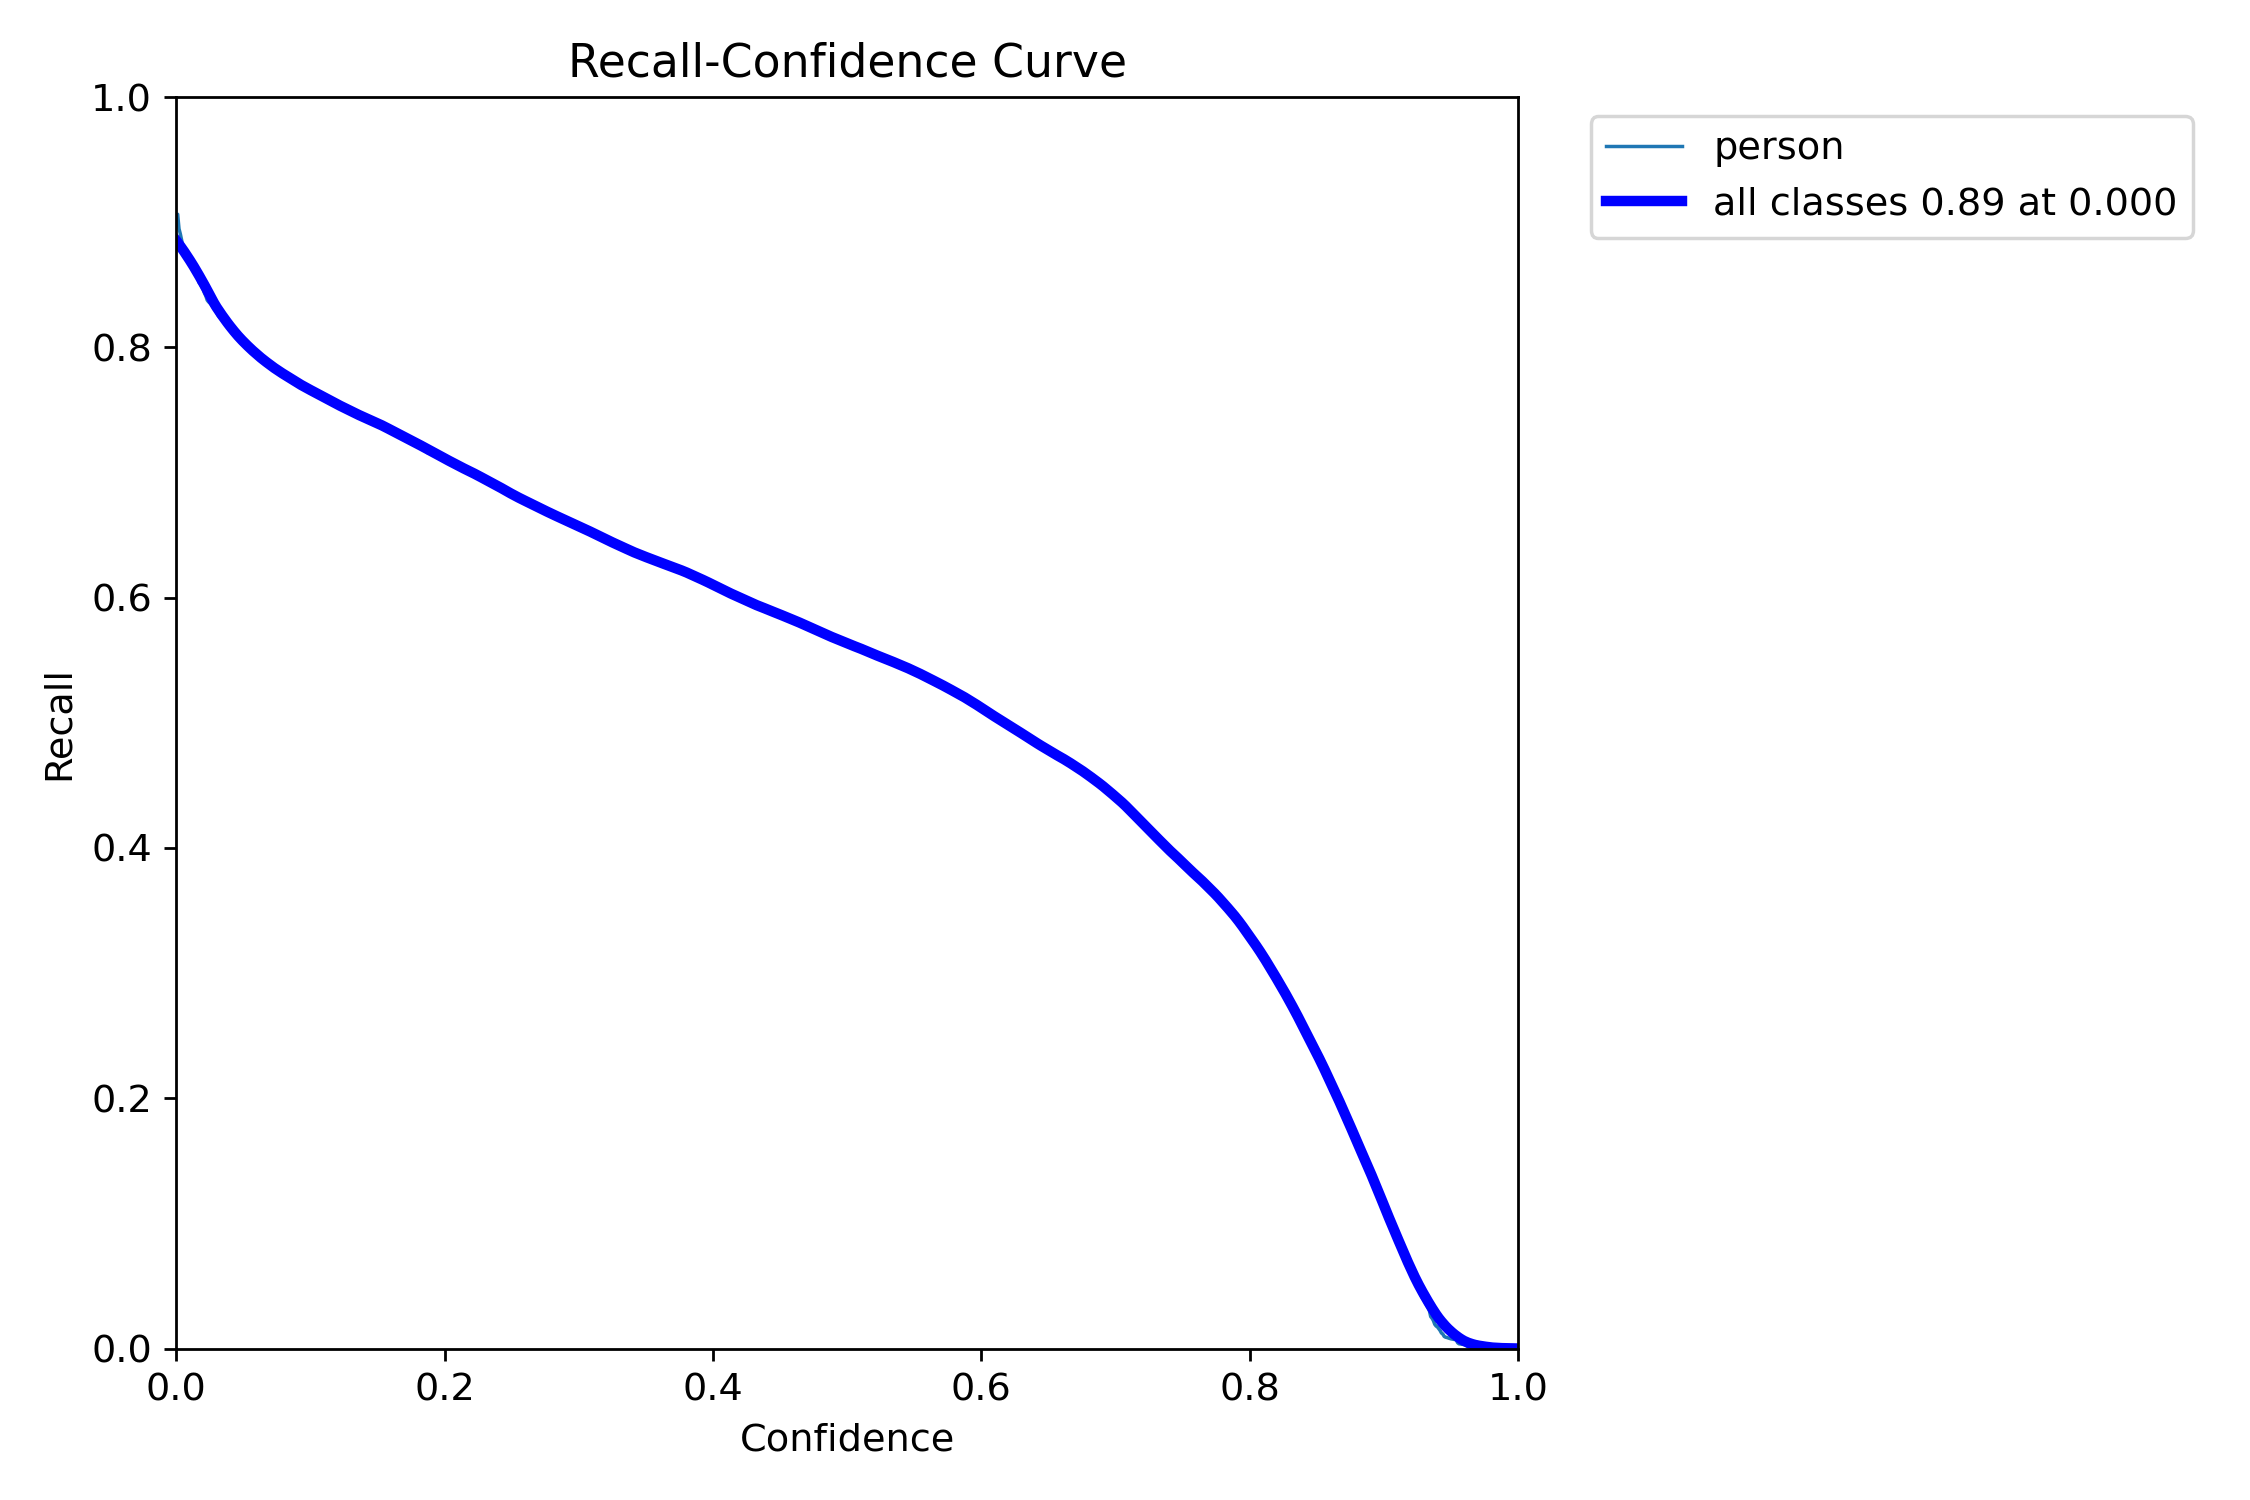

In [ ]:
Image(filename='/content/personDetection-yolov8/train2/R_curve.png', width=600)

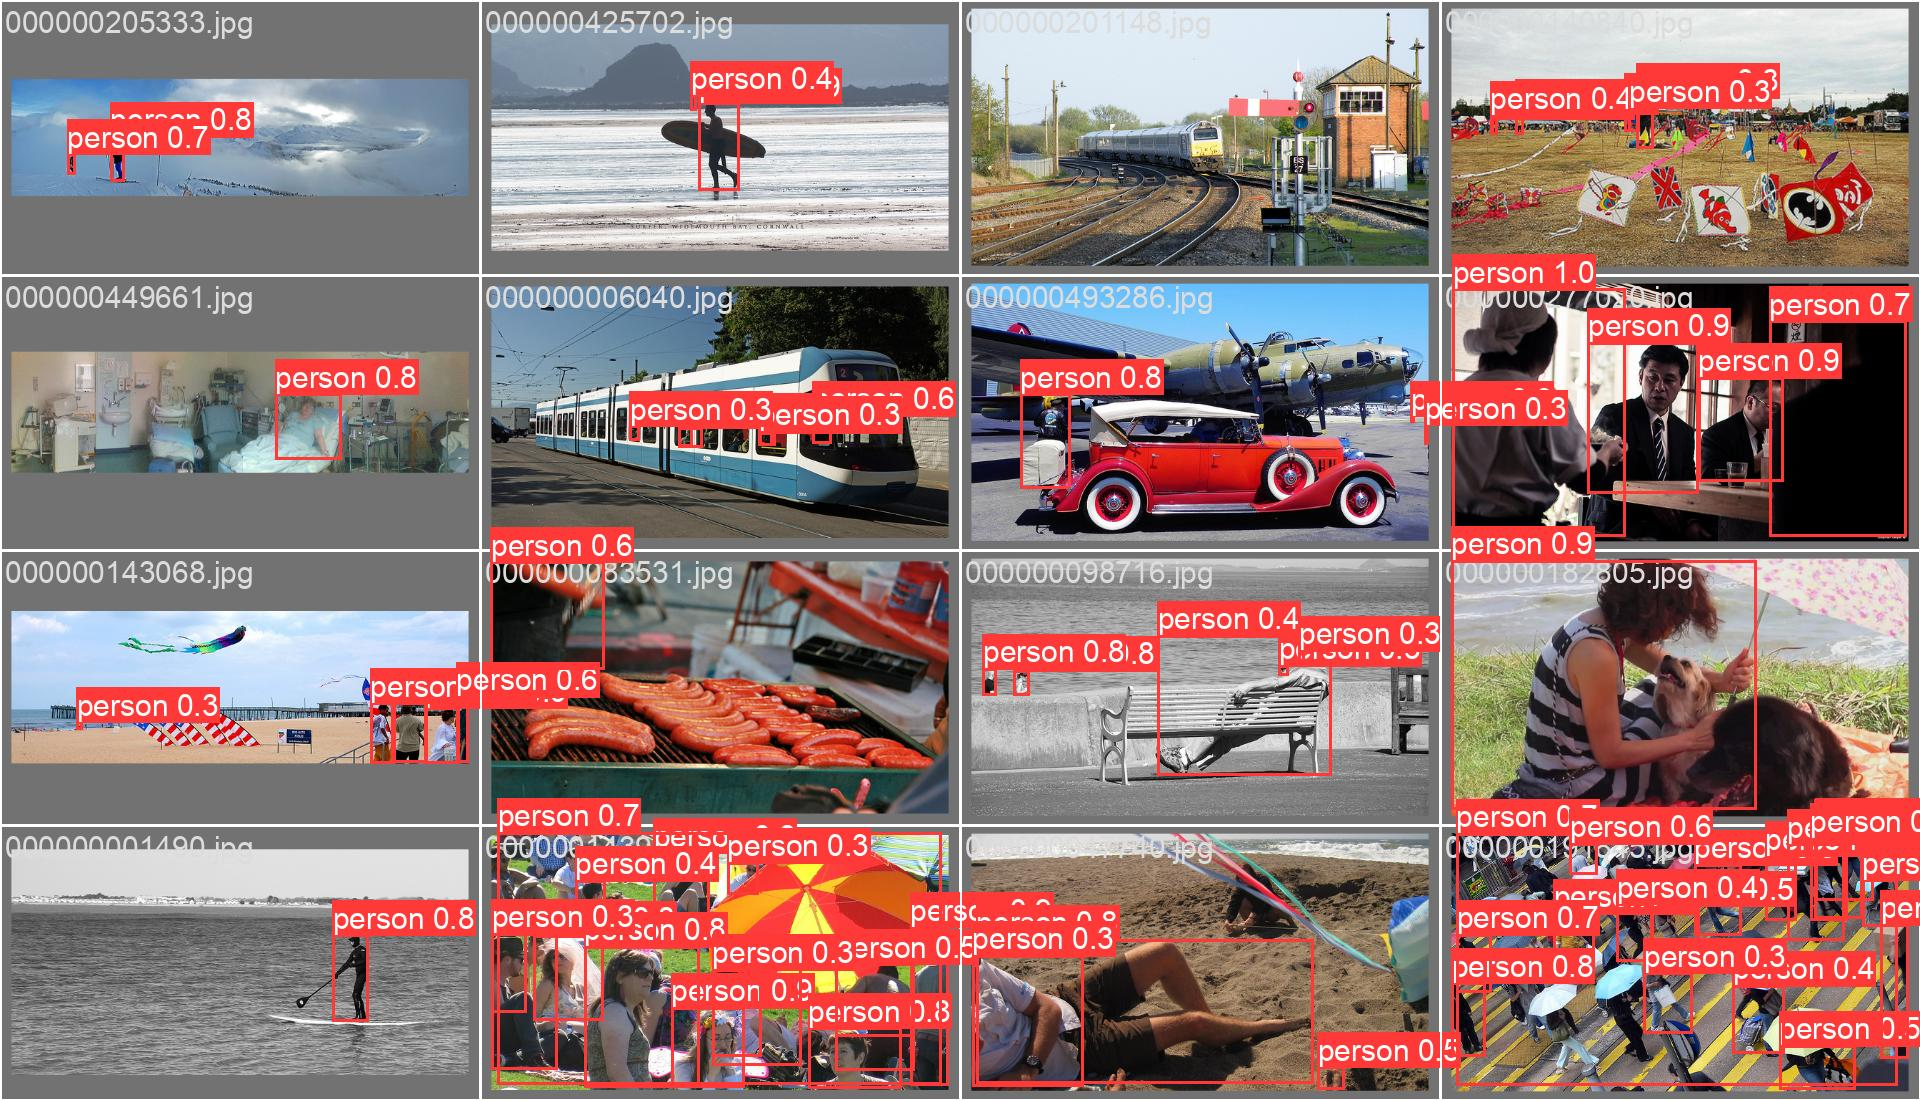

In [ ]:
#Model Prediction on test batch
Image(filename='/content/personDetection-yolov8/train2/val_batch0_pred.jpg', width=600)

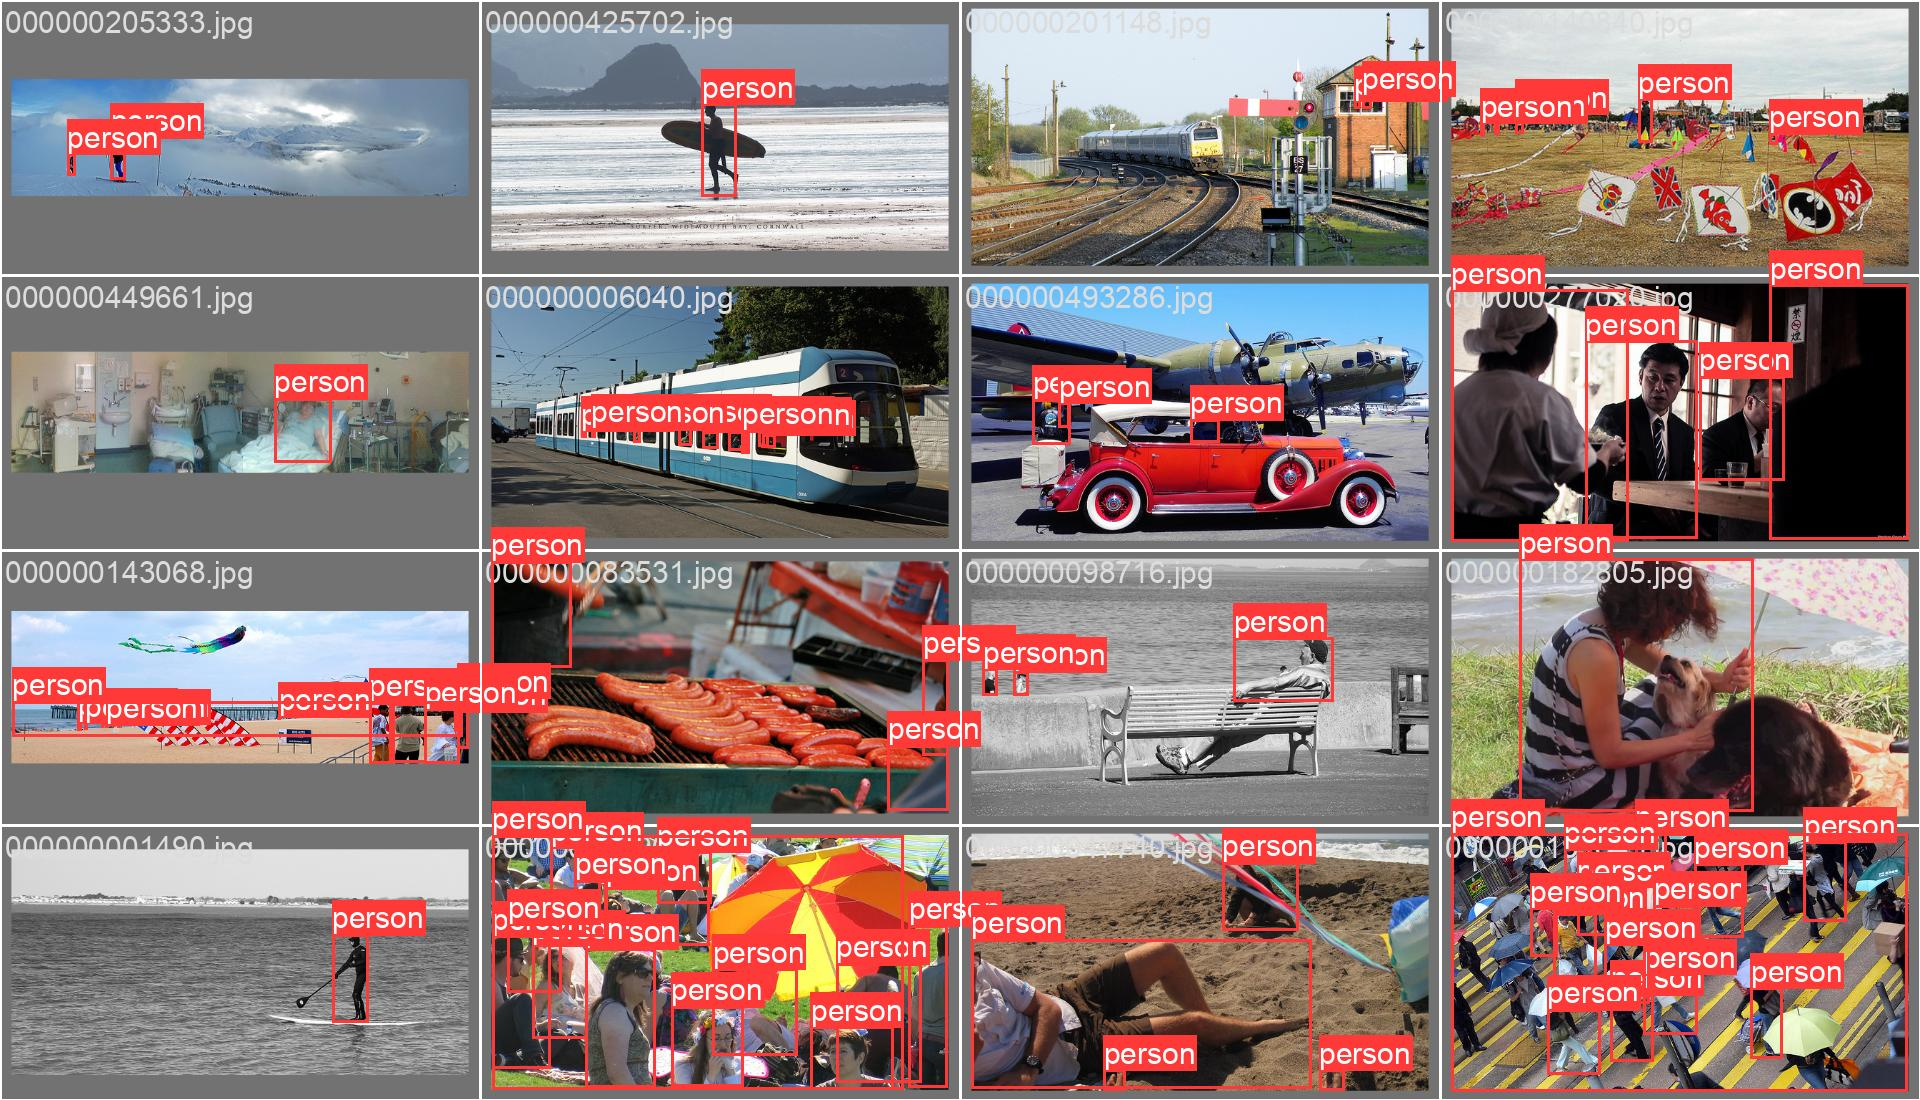

In [ ]:
Image(filename='/content/personDetection-yolov8/train2/val_batch0_labels.jpg', width=600)

In [ ]:
test_results = model.predict('/content/tmp/oiv7-yolo/images/test/000000001490.jpg', save=True, imgsz=320, conf=0.5)


image 1/1 /content/tmp/oiv7-yolo/images/test/000000001490.jpg: 160x320 1 person, 19.4ms
Speed: 2.9ms preprocess, 19.4ms inference, 2.2ms postprocess per image at shape (1, 3, 160, 320)
Results saved to personDetection-yolov8/train4


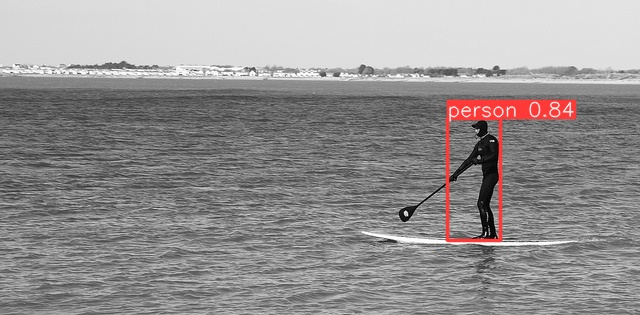

In [ ]:
Image(filename='/content/personDetection-yolov8/train4/000000001490.jpg', width=600)

In [ ]:
video_results = model.predict('/content/People Walking Free Stock Footage, Royalty-Free No Copyright Content.mp4', save=True, conf=0.5)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/3493) /content/People Walking Free Stock Footage, Royalty-Free No Copyright Content.mp4: 384x640 10 persons, 451.4ms
video 1/1 (2/3493) /content/People Walking Free Stock Footage, Royalty-Free No Copyright Content.mp4: 384x640 10 persons, 69.9ms
video 1/1 (3/3493) /content/People Walking Free Stock Footage, Royalty-Free No Copyright Content.mp4: 384x640 10 persons, 36.1ms
video 1/1 (4/3493) /content/People Walking Free Stock Footage, Royal

In [ ]:
from subprocess import run

# Input video path
input_video_path = '/content/personDetection-yolov8/train5/People Walking Free Stock Footage, Royalty-Free No Copyright Content.avi'

# Output compressed video path
output_video_path = "/content/result_compressed.mp4"

# Compress the video using FFmpeg
run(["ffmpeg", "-i", input_video_path, "-vcodec", "libx264", output_video_path])

print("Video compression complete.")

Video compression complete.


In [ ]:
from IPython.display import HTML

# Display the video
HTML(f'<video controls src="{output_video_path}" width="400"></video>')